In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils
from glob import glob
from importlib import reload
import consts
import correlation_analysis as ca
from statannot import add_stat_annotation
import remove_batch_effects as rbe
import sklearn.decomposition, sklearn.cluster
from combat.pycombat import pycombat
reload(consts)
reload(utils)
reload(ca)
reload(rbe)
PATH = os.getcwd()

In [2]:
# Generate combined results and count files. 
RES_PATH = os.path.join(PATH, 'data', 'combined_rna_seq', 'results')
COUNTS_PATH = os.path.join(PATH, 'data', 'combined_rna_seq', 'norm')
RLD_PATH = os.path.join(PATH, 'data', 'combined_rna_seq', 'rld')
METADATA_PATH = os.path.join(PATH, 'data', 'metadata')

results_df = utils.combine_result_files(RES_PATH)
results_df['Name'] = results_df['Name'].str.upper()
results_df.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined_results', 'combined_results.parquet.gzip'), index=False, engine = 'fastparquet', compression='gzip')

counts_comb = utils.combine_counts(COUNTS_PATH, METADATA_PATH).drop(columns = ['replicate', 'platform', 'manipulation'])
counts_comb['gene'] = counts_comb['gene'].str.upper()
counts_comb.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_counts.parquet.gzip'), index=False, engine = 'fastparquet', compression='gzip')

rld_comb = utils.combine_counts(RLD_PATH, METADATA_PATH).drop(columns = ['replicate', 'platform', 'manipulation'])
rld_comb['gene'] = rld_comb['gene'].str.upper()
rld_comb.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_rld.parquet.gzip'), index=False, engine = 'fastparquet', compression='gzip')


No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\norm\norm_HMVEC_hypx.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\norm\norm_HMVEC_hypx_1.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\norm\norm_HUVEC_rna_hypx.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\norm\norm_HUVEC_rna_hypx_2.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\norm\norm_SMC_hypx.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\norm\norm_SMC_hypx_1.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\rld\rld_4t1_cells_hypx.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\rld\rld_HMVEC_hypx.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna_seq\rld\rld_HMVEC_hypx_1.csv
No treatment column in c:\Users\shtolz\Desktop\Hypoxia\data\combined_rna

Found 2 batches.

One batch has only one sample, try setting mean_only=True.

Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:91: RuntimeWarning: invalid value encountered in scalar divide
  return (2*s2+m*m)/s2
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:93: RuntimeWarning: invalid value encountered in scalar divide
  return (m*s2+m*m*m)/s2


Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:498: RuntimeWarning: divide by zero encountered in divide
  s_data = np.divide((dat - stand_mean), \
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Found 6 batches.

One batch has only one sample, try setting mean_only=True.

Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:91: RuntimeWarning: invalid value encountered in scalar divide
  return (2*s2+m*m)/s2
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:93: RuntimeWarning: invalid value encountered in scalar divide
  return (m*s2+m*m*m)/s2
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Only one batch in split HPMEC. No batch correction done.
Only one batch in split MDA-MB-175. No batch correction done.
Only one batch in split MDA-MB-157. No batch correction done.
Only one batch in split MCF12A. No batch correction done.
Only one batch in split MCF10A. No batch correction done.
Only one batch in split htert-HME. No batch correction done.
Only one batch in split SUM185. No batch correction done.
Only one batch in split ZR-75-1. No batch correction done.
Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:498: RuntimeWarning: divide by zero encountered in divide
  s_data = np.divide((dat - stand_mean), \
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Only one batch in split SUM229. No batch correction done.
Only one batch in split BT474. No batch correction done.
Only one batch in split BT20. No batch correction done.
Only one batch in split HS578T. No batch correction done.
Only one batch in split HME2. No batch correction done.
Only one batch in split HCC38. No batch correction done.
Only one batch in split HCC1954. No batch correction done.
Only one batch in split HCC1806. No batch correction done.
Only one batch in split HCC1937. No batch correction done.
Only one batch in split HCC1569. No batch correction done.
Only one batch in split SUM159. No batch correction done.
Only one batch in split SUM149. No batch correction done.
Only one batch in split Sum225CWN. No batch correction done.
Only one batch in split SUM1315. No batch correction done.
Only one batch in split SKBR3. No batch correction done.
Only one batch in split MDA-MB-468. No batch correction done.
Only one batch in split MDAMB436. No batch correction done.
Only on

C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Only one batch in split LNCaP. No batch correction done.
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Only one batch in split HKC. No batch correction done.
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Only one batch in split RCC4. No batch correction done.
Only one batch in split SK-MEL-28. No batch correction done.
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Only one batch in split MDA_231. No batch correction done.
Found 2 batches.

One batch has only one sample, try setting mean_only=True.

Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:91: RuntimeWarning: invalid value encountered in scalar divide
  return (2*s2+m*m)/s2
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:93: RuntimeWarning: invalid value encountered in scalar divide
  return (m*s2+m*m*m)/s2


Found 5 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Only one batch in split RPE. No batch correction done.
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Only one batch in split MM. No batch correction done.
Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


sample,AC,AH,BC,BH,DM12,DM13,DM14,DM15,DM16,DM17,...,SRR3129726,SRR3175541,SRR3175542,SRR3175543,SRR3175544,SRR3175545,SRR3175546,SRR3175547,SRR3175548,SRR3175549
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,8.035089,8.047345,8.052617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1BG-AS1,8.307067,8.296155,8.308964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,8.144201,8.299170,8.172751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.200672,5.229696,5.235447,5.235377,5.216431,5.235651,5.213846,5.203458,5.223849,5.203488
A4GALT,8.973895,9.010431,8.916639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.871819,9.926152,9.927100,9.925385,9.941095,9.940097,9.940900,9.932524,9.933124,9.932958
AAAS,11.079695,11.066413,11.079534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.708593,10.726508,10.726743,10.727278,10.722659,10.724164,10.722733,10.722808,10.724135,10.723294


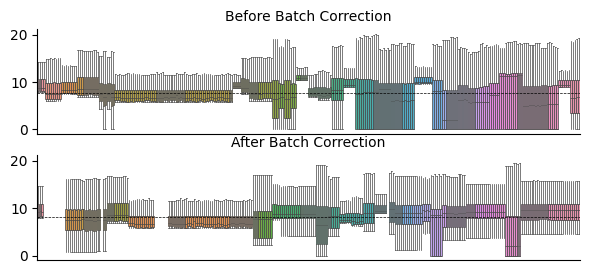

In [3]:
reload(rbe)
# Batch correction for counts_comb
rld_comb = rld_comb.sort_values(by = 'sample')
counts_comb_matrix = rld_comb.pivot_table(index = 'sample', columns = 'gene', values = 'counts', aggfunc = 'mean').fillna(0, axis = 1)

# Drop genes with 0 counts in majority of samples
counts_comb_matrix = counts_comb_matrix.loc[:, (counts_comb_matrix > 0).mean() > 0.5].T
counts_comb_bc, sample_data = rbe.main_split_by(counts_comb_matrix, rld_comb)
counts_comb_bc.head()

In [4]:

# Save batch corrected counts and sample data
counts_comb_matrix.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_counts_matrix.parquet.gzip'), index=True, engine = 'fastparquet', compression='gzip')
counts_comb_bc.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_rld_bc_per_celltype.parquet.gzip'), index=True, engine = 'fastparquet', compression='gzip')
# Add cell type to sample_data
sample_data = counts_comb.groupby('run_accession').agg({'dataset' : 'first', 'cell_type' : 'first', 'treatment' : 'first'})
sample_data['dataset'] = sample_data['dataset'].str.replace('norm_', '')

sample_data.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_sample_data.parquet.gzip'), index=True, engine = 'fastparquet', compression='gzip')

In [5]:
counts_comb = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_rld.parquet.gzip'))
counts_comb.dataset = counts_comb.dataset.str.replace('norm_', '').str.replace('rld_', '')
ox_genes = counts_comb[(counts_comb['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])) & (counts_comb['treatment'].isin(['Normoxia', 'Hypoxia']))].gene.unique().tolist()
display(len(ox_genes))
results_df = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined_results', 'combined_results.parquet.gzip')).rename(columns = {'Name' : 'gene'})
counts_comb_bc = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_rld_bc_per_celltype.parquet.gzip'))
counts_comb_matrix = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_counts_matrix.parquet.gzip'))
sample_data = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined', 'combined_sample_data.parquet.gzip'))


counts_comb = counts_comb[counts_comb['gene'].isin(counts_comb_bc.index)]

ox_genes = counts_comb[(counts_comb['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])) & (counts_comb['treatment'].isin(['Normoxia', 'Hypoxia']))].gene.unique().tolist()
display(len(ox_genes))
# Replace the dataset col with cell type and an index for each dataset within the cell type
count_dict = {i:1 for i in counts_comb.cell_type.unique()}

for dataset in counts_comb.dataset.unique():
    cell_type = counts_comb[counts_comb.dataset == dataset].cell_type.unique()[0]
    name = cell_type + ' ' + str(count_dict[cell_type]) if count_dict[cell_type] > 1 else cell_type
    count_dict[cell_type] += 1
    counts_comb.loc[counts_comb['dataset'] == dataset, 'dataset'] = name
    results_df.loc[results_df['dataset'] == dataset, 'dataset'] = name


221

197

In [6]:
# Generate summaries of the number of samples, datasets and cell types represented
print(f"Total number of samples: {len(counts_comb['sample'].unique())}\nSplit into {len(results_df.dataset.unique())} different datasets\nBelonging to {len(results_df.cell_line.unique())} different cells with an average of {results_df.groupby('cell_line').agg({'dataset' : 'nunique'}).mean()}+- {results_df.groupby('cell_line').agg({'dataset' : 'nunique'}).std()} datasets per cell")

Total number of samples: 275
Split into 28 different datasets
Belonging to 20 different cells with an average of dataset    1.4
dtype: float64+- dataset    0.753937
dtype: float64 datasets per cell


In [7]:
mt_per_dataset = results_df[results_df['Genome'] == 'MT'].groupby(['gene', 'dataset']).agg({'log2FoldChange' : 'mean', 'padj' : 'mean',}).reset_index().sort_values(by=['gene'], ascending=False)

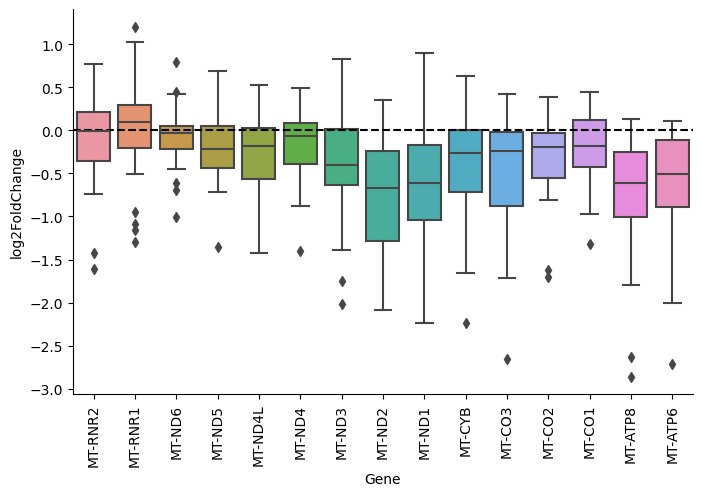

In [8]:
_, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(ax = ax, data = mt_per_dataset, x = 'gene', y = 'log2FoldChange')
# Rotate x-axis labels in ax level
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Despine
sns.despine()
# Set axes titles
ax.set_xlabel('Gene')
ax.set_ylabel('log2FoldChange')
# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')



In [9]:
coordinated,uncoordinated, unknown, coord_mag,  coord_mag_dict, nuc_mag_dict = utils.mitonuclear_coordination(results_df)

Not enough both genes in A549 (MT: 1, NUC: 9). Skipping...
Not enough both genes in A549 2 (MT: 6, NUC: 6). Skipping...
Not enough both genes in A549 3 (MT: 4, NUC: 57). Skipping...
Not enough both genes in HUVEC_rna_hypx (MT: 4, NUC: 29). Skipping...
Not enough both genes in MDA_231 (MT: 1, NUC: 69). Skipping...
Not enough both genes in PC3 (MT: 1, NUC: 47). Skipping...
Not enough both genes in RCC4 (MT: 3, NUC: 33). Skipping...
Not enough both genes in SMC_hypx_1 (MT: 0, NUC: 43). Skipping...
Not enough both genes in U87 (MT: 0, NUC: 22). Skipping...
Out of 27 datasets, 9 datasets were skipped due to insufficient genes.
16 datasets were coordinated, and 2 datasets were uncoordinated.
The magnitude of coordination was 0.14 +- 0.15


In [10]:
hyp_samples = counts_comb[counts_comb['treatment'] == 'Hypoxia']['sample'].unique()
norm_samples = counts_comb[counts_comb['treatment'] == 'Normoxia']['sample'].unique()

In [11]:
reg_genes_df = pd.read_csv(os.path.join(PATH, 'data', 'genes', 'RNAstabilityAndTranscriptGenes.tsv'),sep = '\t')
reg_genes = reg_genes_df.Name.unique()


In [12]:
    
oxphos_counts = counts_comb[(counts_comb['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])) & (counts_comb['treatment'].isin(['Normoxia', 'Hypoxia']))].reset_index(drop=False)
new_df = []
oxphos_results = results_df[results_df['gene'].isin(oxphos_counts['gene'])]

print(len(oxphos_counts))
oxphos_counts = oxphos_counts.sort_values(by = 'run_accession')

oxphos_matrix = oxphos_counts.pivot_table(index = 'sample', columns = 'gene', values = 'counts', aggfunc = 'mean').dropna(axis = 1)


for dataset in oxphos_counts.dataset.unique():

    genes = oxphos_results.loc[(oxphos_results['dataset'] == dataset) & (oxphos_results.padj < 0.05)]['gene'].unique()
    # Filter out genes that are not significant from oxphos_counts
    new_df.append(oxphos_counts[(oxphos_counts['dataset'] == dataset) & (oxphos_counts['gene'].isin(genes))])
oxphos_counts_sign = pd.concat(new_df).reset_index(drop=True)
print(len(oxphos_counts_sign))
oxphos_counts_sign = ca.resid_per_grp(oxphos_counts_sign, grp_cols = ['gene'],
                                  var_col = 'counts',predic_cols = ['cell_type', 'dataset'])

oxphos_counts_sign['z-score'] = oxphos_counts_sign.groupby(['dataset', 'Genome'])['counts'].transform(lambda x: (x - x.mean()) / x.std())
oxphos_counts['z-score'] = oxphos_counts.groupby(['dataset', 'Genome'])['counts'].transform(lambda x: (x - x.mean()) / x.std())

61129
13424


In [13]:
oxphos_mat_corrected = counts_comb_bc.loc[oxphos_counts.gene.unique(),:].fillna(0)


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


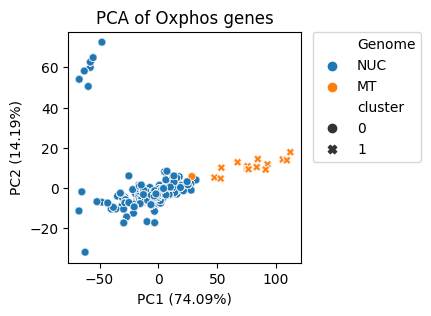

In [14]:
# By gene PCA plot
pc = sklearn.decomposition.PCA(n_components=2).fit(oxphos_mat_corrected)
pca = pd.DataFrame(pc.transform(oxphos_mat_corrected), index = oxphos_mat_corrected.index, columns = ['PC1', 'PC2'])
pca = pca.reset_index().merge(oxphos_counts[['gene','run_accession', 'Complex', 'Genome']].drop_duplicates(), on = 'gene',  how = 'left')
# Cluster the pca data using kmeans
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit_predict(pca[['PC1', 'PC2']]).astype(str)
pca['cluster'] = kmeans

# Plot the PCA results, colored by dataset and shape by treatment
fig, ax = plt.subplots(figsize = (3,3))
sns.scatterplot(x = 'PC1', y = 'PC2', data = pca, hue = 'Genome', style = 'cluster', ax = ax, legend = True, s = 30, alpha = 0.5)
# Add circles around the clusters


# Add variation explained to the plot
var_expl = pc.explained_variance_ratio_ * 100
ax.set_title('PCA of Oxphos genes')

ax.set_xlabel(f'PC1 ({var_expl[0]:.2f}%)')
ax.set_ylabel(f'PC2 ({var_expl[1]:.2f}%)')
# Legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig(os.path.join(PATH, 'figures', 'oxphos_pca_by_gene_only.png'), dpi = 300, bbox_inches='tight')


C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


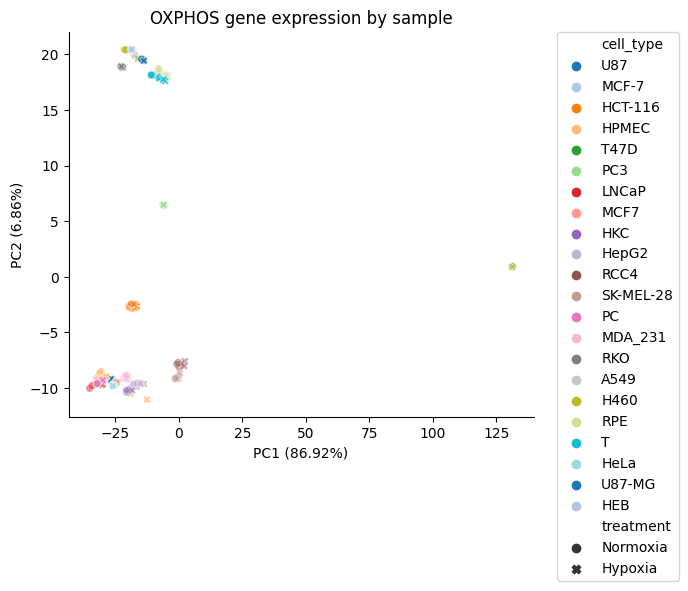

In [15]:
# By sample PCA plot
oxphos_mat_corrected_bysample = oxphos_mat_corrected.T
pc = sklearn.decomposition.PCA(n_components=2).fit(oxphos_mat_corrected_bysample)
pca = pd.DataFrame(pc.transform(oxphos_mat_corrected_bysample), index = oxphos_mat_corrected_bysample.index, columns = ['PC1', 'PC2'])
pca = pca.reset_index().merge(oxphos_counts[['dataset', 'cell_type', 'sample', 'treatment']].drop_duplicates(), on = 'sample',  how = 'left')
# Cluster the pca data using kmeans
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit_predict(pca[['PC1', 'PC2']]).astype(str)
pca['cluster'] = kmeans

# Plot the PCA results, colored by dataset and shape by treatment
fig, ax = plt.subplots(figsize = (6,5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = pca, hue = 'cell_type', style = 'treatment', ax = ax, legend = True, s = 30, alpha = 0.5, palette = "tab20")
# Add circles around the clusters


# Add variation explained to the plot
var_expl = pc.explained_variance_ratio_ * 100
ax.set_title('OXPHOS gene expression by sample')

ax.set_xlabel(f'PC1 ({var_expl[0]:.2f}%)')
ax.set_ylabel(f'PC2 ({var_expl[1]:.2f}%)')
# Legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Despine
sns.despine()
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_pca_by_sample.png'), dpi = 300, bbox_inches='tight')


In [16]:
results_df_mat = results_df[results_df['padj'] < 0.05].pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat.loc[((results_df_mat != 0).mean(axis = 1)) > 0.5, :]

dataset,A549,A549 2,A549 3,H460,HCT-116 2,HCT-116 3,HCT-116 5,HPMEC,HPMEC 2,HUVEC_rna_hypx,...,MDA_231,PC3,PC3_hypx_1,RCC4,RKO,RPE,SMC_hypx_1,T 2,T47D,U87
gene,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.039969,NaN,NaN,NaN
A2M-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.867424,-0.867424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2ML1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,NaN,NaN,NaN,-1.013298,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.916845,NaN,NaN,NaN,-1.830954,-1.085763,NaN
ZYG11B,NaN,NaN,NaN,0.436992,NaN,NaN,NaN,-0.231480,-0.231481,NaN,...,NaN,0.629044,NaN,-0.723463,NaN,0.298379,0.347079,NaN,0.583779,NaN
ZYX,NaN,NaN,NaN,0.792215,0.977233,NaN,0.575231,0.255243,0.255243,-0.456872,...,0.613151,0.483829,0.275115,NaN,NaN,-0.757821,0.632612,NaN,NaN,NaN


In [17]:
results_df_mat = results_df[results_df['padj'] < 0.05].pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat = results_df_mat.dropna(axis = 1, how = 'all').fillna(0)
# Select oxphos genes 
oxphos_results = results_df_mat.loc[oxphos_counts.gene.unique(),:]
# Sort oxphos_results by median LFC
oxphos_results = oxphos_results.loc[oxphos_results.median(axis = 1).sort_values(ascending = False).index,:]
# Drop genes with 0 LFC in majority of samples
# Reg gene results
reg_genes_mat = results_df_mat.loc[[i.upper() for i in reg_genes if i in results_df_mat.index],:]
# Sort reg_genes_mat by median LFC
reg_genes_mat = reg_genes_mat.loc[reg_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Drop genes with 0 LFC in majority of samples
reg_genes_mat = reg_genes_mat.loc[((reg_genes_mat != 0).mean(axis = 1)) > 0.5, :]
oxphos_results = oxphos_results.loc[((oxphos_results != 0).mean(axis = 1)) > 0.5, :]
# Drop U87-MG and HEB columns
reg_genes_mat = reg_genes_mat.drop(columns = ['U87-MG 2', 'HEB', 'mean', 'U87-MG'], errors = 'ignore')
reg_genes_mat.head()


dataset,A549,A549 2,A549 3,H460,HCT-116 2,HCT-116 3,HCT-116 5,HPMEC,HPMEC 2,HUVEC_rna_hypx,...,MDA_231,PC3,PC3_hypx_1,RCC4,RKO,RPE,SMC_hypx_1,T 2,T47D,U87
gene,,,,,,,,,,,,,,,,,,,,,
AK4,2.547189,2.511078,1.997526,2.591553,1.791497,1.479066,1.184458,0.959486,0.959486,3.061725,...,-0.407407,0.870633,0.635181,1.671361,0.000000,1.497057,0.878673,3.304296,2.336242,1.113295
DUSP1,0.962302,0.000000,1.514291,1.613206,1.699214,2.780043,2.010214,0.583368,0.583368,1.499584,...,1.505825,1.338598,0.567368,2.570483,1.472471,0.624877,-1.132195,0.443289,1.056034,0.581699
JUN,1.182081,0.918183,1.840672,1.795963,2.956818,0.000000,1.343957,0.000000,0.000000,0.562707,...,0.586639,0.000000,0.448920,1.371435,0.000000,1.086044,-0.790808,1.230504,1.596433,0.426021
FOSL2,0.000000,0.000000,0.499837,1.225585,2.918804,3.041824,2.234583,0.000000,0.000000,0.384017,...,0.552959,0.797448,0.900917,0.000000,2.298259,0.949187,0.000000,0.469622,2.009815,0.000000
FOS,0.000000,0.000000,2.327177,1.558677,1.090806,1.108253,-0.432852,0.000000,0.000000,0.000000,...,-1.362741,0.000000,1.813886,0.000000,0.000000,1.418982,0.612951,1.486140,3.610156,0.000000


In [18]:
# Load glycolysis genes
glycolysis_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'glycolytic processGO_0006096.txt'))
# Drop duplicate genes
glycolysis_genes = glycolysis_genes.drop_duplicates()
# Drop gene value 'gene'
glycolysis_genes = glycolysis_genes[glycolysis_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
glycolysis_genes = [i.upper() for i in glycolysis_genes]

# Load ROS genes
ros_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'ROS_production.tsv'))
# Drop duplicate genes
ros_genes = ros_genes.drop_duplicates().Name.unique().tolist()
# Upper list
ros_genes = [i.upper() for i in ros_genes]

# Lactate dehydrogenase genes
ldh_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'L-lactate dehydrogenase activityGO_0004459.txt'))
# Drop duplicate genes
ldh_genes = ldh_genes.drop_duplicates()
# Drop gene value 'gene'
ldh_genes = ldh_genes[ldh_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
ldh_genes = [i.upper() for i in ldh_genes]


# Create glyc genes mat
gly_genes_mat = results_df_mat.loc[[i for i in glycolysis_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
gly_genes_mat = gly_genes_mat.loc[((gly_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.isna().mean(axis = 1) < 0.5, :]
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create ros genes mat
ros_genes_mat = results_df_mat.loc[[i for i in ros_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
ros_genes_mat = ros_genes_mat.loc[((ros_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.isna().mean(axis = 1) < 0.5, :]
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]



In [19]:
col_annot = sample_data.copy()
# Convert cell_type to colors for plotting
colors = dict(zip(col_annot['dataset'].unique(), sns.color_palette('tab10', n_colors = len(col_annot['dataset'].unique()))))
col_annot['Cell Type'] = col_annot['dataset'].map(colors)
col_annot['Treatment'] = col_annot['treatment'].map({'Normoxia' : 'black', 'Hypoxia' : 'red'})


In [20]:
coord_dict = {i : 'purple' for i in coordinated}
coord_dict.update({i : 'orange' for i in uncoordinated})
coord_dict.update({i : 'grey' for i in unknown})


results_df['cell_type'] = results_df['dataset'].apply(lambda x: x.split('_')[0].split(' ')[0].upper())
results_df['Genome'] = results_df['Genome'].fillna('NUC')
results_annot = results_df.groupby('dataset').agg({'cell_type' : 'first'}).reset_index()

colors = dict(zip(results_annot['cell_type'].unique(), sns.color_palette('tab20', n_colors = len(results_annot['cell_type'].unique()))))
results_annot['Cell Type'] = results_annot['cell_type'].map(colors)
results_annot = results_annot.set_index('dataset')
results_annot['Coordination'] = results_annot.index.map(coord_dict)
display(results_annot.head(2))

gene_annot = results_df.groupby('gene').agg({'Genome' : 'first', 'Complex' : 'first', 'Description' : 'first'}).reset_index().set_index('gene')
# Add ap1 annotation
gene_annot['AP1'] = gene_annot.index.isin(consts.AP1)
genome_colors = {'NUC' : 'blue', 'MT' : 'red'}
gene_annot['Genome'] = gene_annot['Genome'].map(genome_colors)
gene_annot['Complex'] = gene_annot['Complex'].map({'I' : 'green', 'II' : 'orange', 'III' : 'purple', 'IV' : 'brown', 'V' : 'pink', 'Ribosome' : 'grey'})
gene_annot['AP1'] = gene_annot['AP1'].map({True : 'red', False : 'grey'})

reg_genes_annot = gene_annot.loc[[i.upper() for i in reg_genes_mat.index if i in gene_annot.index],:]
display(gene_annot.head(2))

,cell_type,Cell Type,Coordination
dataset,,,
A549,A549,"(0.12156862745098039, 0.4666666666666667, 0.70...",grey
A549 2,A549,"(0.12156862745098039, 0.4666666666666667, 0.70...",grey


,Genome,Complex,Description,AP1
gene,,,,
5S_RRNA.1,blue,NaN,None,grey
5S_RRNA.12,blue,NaN,None,grey


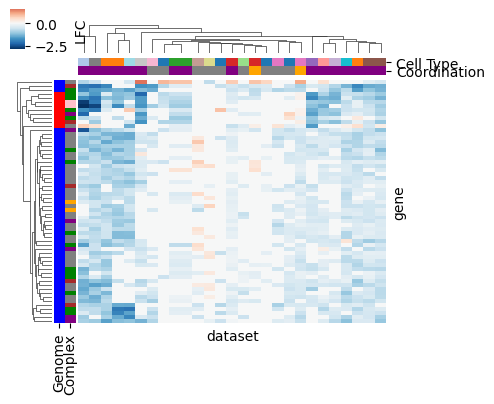

In [21]:
sns.clustermap(oxphos_results, cmap = 'RdBu_r', center = 0, figsize = (5,4), col_cluster = True, row_cluster = True, yticklabels = False, xticklabels = False, col_colors = results_annot[['Cell Type', 'Coordination']], row_colors = gene_annot[['Genome', 'Complex']], cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.02, 0.9, 0.03, 0.1), rasterized = True, mask = False)

C:\Users\shtolz\AppData\Local\Temp\ipykernel_60432\580897576.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


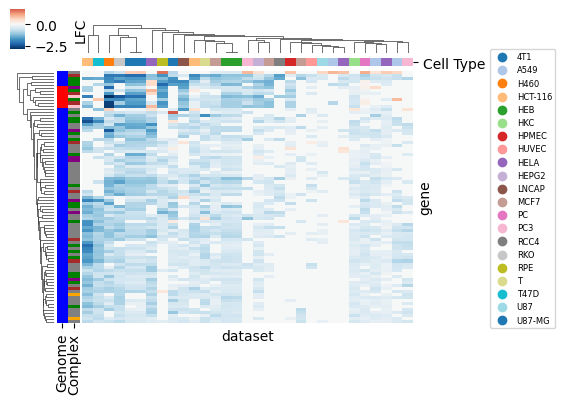

In [ ]:
sns.clustermap(oxphos_results, cmap = 'RdBu_r', center = 0, figsize = (5,4), col_cluster = True, row_cluster = True, yticklabels = False, xticklabels = False, col_colors = results_annot['Cell Type'], row_colors = gene_annot[['Genome', 'Complex']], cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.02, 0.9, 0.03, 0.1), rasterized = True, mask = False)

# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove X and Y labels
# Add legend for genome

plt.legend(bbox_to_anchor=(32, 0), loc=2, borderaxespad=0., fontsize = 6)

# Change the 

C:\Users\shtolz\AppData\Local\Temp\ipykernel_60432\208742040.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


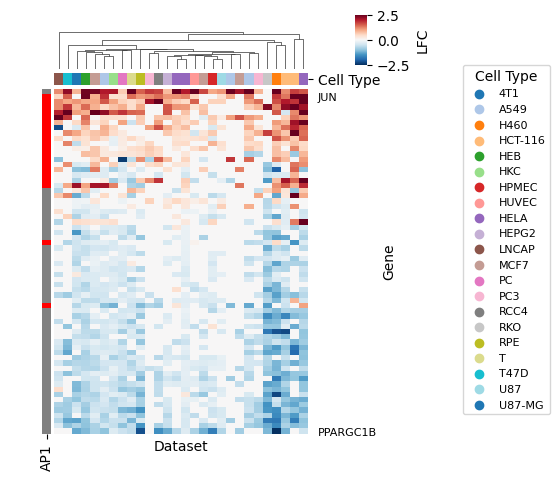

In [ ]:
genes_of_interest = ['JUN', 'PPARGC1B', 'PPARGC1A']
labels = [i if i in genes_of_interest else None for i in reg_genes_mat.index]
cm = sns.clustermap(reg_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']], row_colors = gene_annot['AP1'],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, yticklabels = labels, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'reg_genes_clustermap.png'), dpi = 300, bbox_inches='tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_60432\88379628.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


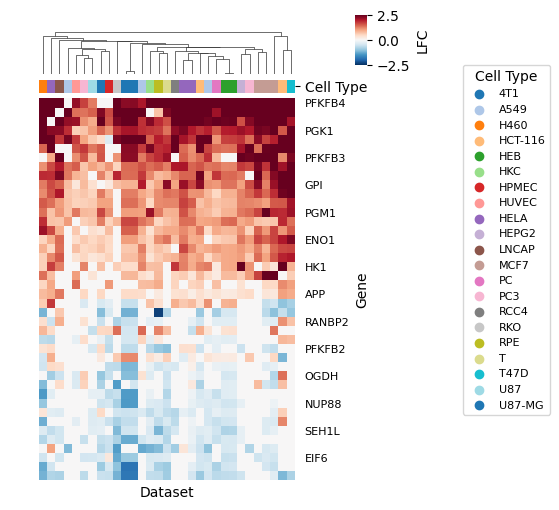

In [ ]:
genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(gly_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'gly_genes_clustermap.png'), dpi = 300, bbox_inches='tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_60432\2194216751.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


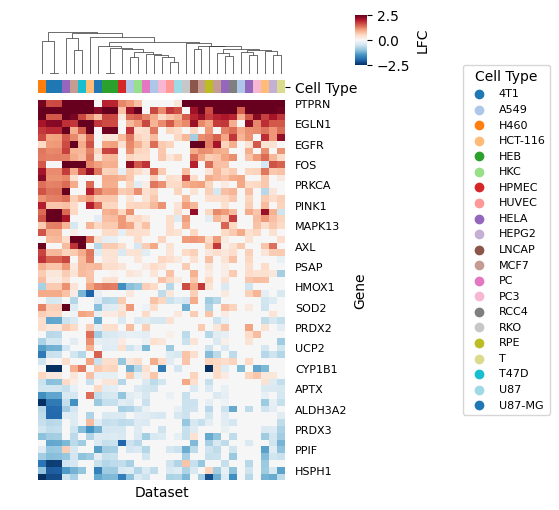

In [ ]:
genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(ros_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'ros_genes_clustermap.png'), dpi = 300, bbox_inches='tight')

<Axes: xlabel='gene', ylabel='dataset'>

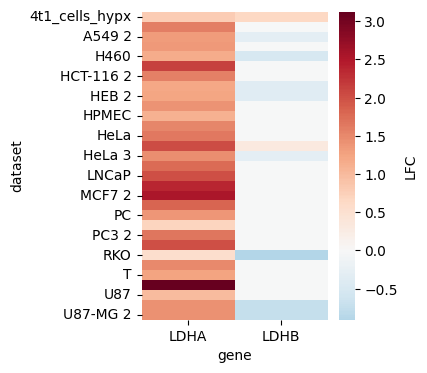

In [ ]:
_, ax = plt.subplots(figsize = (3,4))
sns.heatmap(results_df_mat.loc[['LDHA', 'LDHB'], :].T, cmap = 'RdBu_r', center = 0, cbar_kws = {'label' : 'LFC'}, rasterized = True, mask = False)

In [ ]:
hela_nuc = oxphos_counts_sign[(oxphos_counts_sign['cell_type'] == 'U87-MG') & (oxphos_counts_sign['Genome'] == 'NUC')].reset_index(drop = True)
print(hela_nuc[hela_nuc['treatment'] == 'Normoxia']['z-score'].mean())
oxphos_counts_sign[(oxphos_counts_sign['cell_type'] == 'U87-MG') & (oxphos_counts_sign['Genome'] == 'NUC') & (oxphos_counts_sign['treatment'] == 'Hypoxia')].reset_index(drop = True)['z-score'].mean()

0.159698702123103


-0.15969870212309864

TypeError: Axes.boxplot() got an unexpected keyword argument 'errorbar'

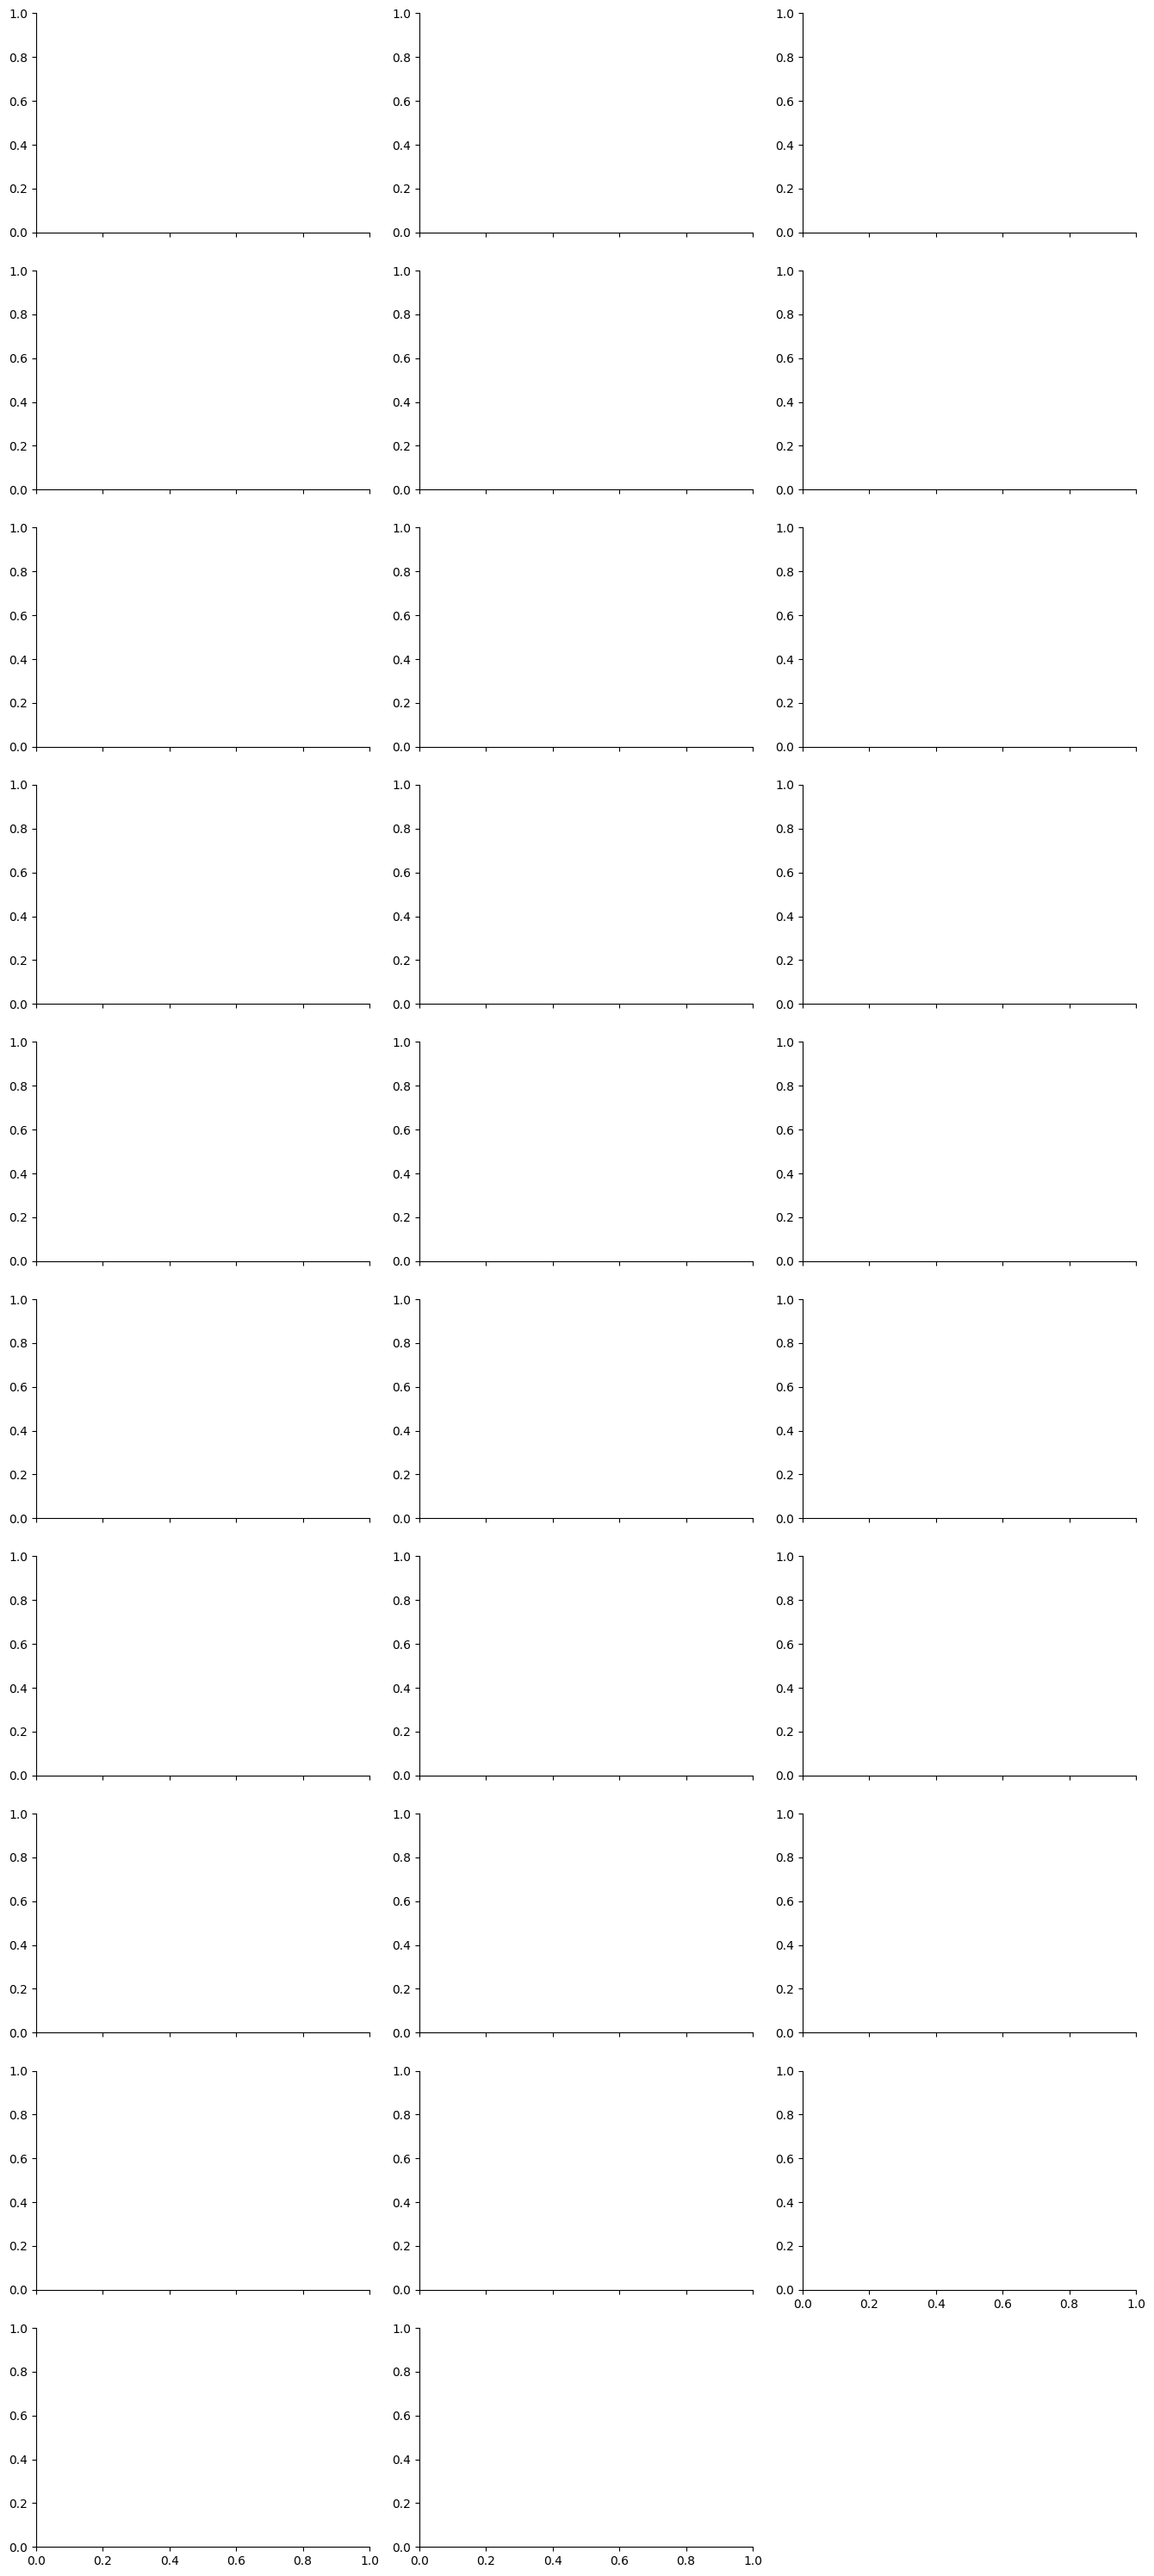

In [ ]:
# Order the plots by the mean difference in z-score between the two genomes
for x in oxphos_counts_sign.dataset.unique():
    hypx_nuc_mean = (oxphos_counts_sign[(oxphos_counts_sign['dataset'] == x) & (oxphos_counts_sign['treatment'] == 'Hypoxia') & (oxphos_counts_sign['Genome'] == 'NUC')]['counts'].mean())
    norm_nuc_mean = (oxphos_counts_sign[(oxphos_counts_sign['cell_type'] == x) & (oxphos_counts_sign['treatment'] == 'Normoxia') & (oxphos_counts_sign['Genome'] == 'NUC')]['counts'].mean())
    hypx_mt_mean = (oxphos_counts_sign[(oxphos_counts_sign['dataset'] == x) & (oxphos_counts_sign['treatment'] == 'Hypoxia') & (oxphos_counts_sign['Genome'] == 'MT')]['counts'].mean())
    norm_mt_mean = (oxphos_counts_sign[(oxphos_counts_sign['cell_type'] == x) & (oxphos_counts_sign['treatment'] == 'Normoxia') & (oxphos_counts_sign['Genome'] == 'MT')]['counts'].mean())
    mean_diff =  (norm_nuc_mean - hypx_nuc_mean) + (norm_mt_mean - hypx_mt_mean)
    oxphos_counts_sign.loc[oxphos_counts_sign['dataset'] == x, 'mean_diff'] = mean_diff

oxphos_counts_sign = oxphos_counts_sign.sort_values(by = ['mean_diff'], ascending = False)
# Create a dot plot of the z-scores for each cell line, genome, and treatment combination
g = sns.catplot(x = 'Genome', y = 'z-score', data = oxphos_counts_sign, kind = 'box', col = 'dataset', col_wrap = 3, dodge = True, height = 3, aspect = 1.5, sharey = False, sharex = True, hue = 'treatment', errorbar='se', col_order = oxphos_counts_sign.dataset.unique())

g.set_axis_labels('', 'Scaled Expression')
# Add the number of genes per cell line, genome, and treatment combination
g.set_titles('{col_name}', size = 12)
#g.set(ylim = (-.55, .55))
g.despine(left = False)
# Set the alpha of the points and errorbars to 0.5
for ax in plt.gcf().axes:
    ax.grid(False)
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)

# Save fig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_ribo_mt_nuc_coexpression.pdf'), dpi = 300, bbox_inches = 'tight')


In [ ]:
reload(utils)
pairs = [(('Normoxia', 'MT'), ('Hypoxia', 'MT')),
         (('Normoxia', 'NUC'), ('Hypoxia', 'NUC'))]
pairs_box = [(('NUC', 'Normoxia'), ('NUC', 'Hypoxia')),
             (('MT', 'Normoxia'), ('MT', 'Hypoxia'))]
interesting_cells = ['RKO', 'HEB', 'H460', 'U87-MG', 'RPE', 'T', 'HCT-116', 'HepG2', 'MCF7', 'HKC', 'RCC4', 'LNCaP']
unwanted_datasets = ['HeLa_hypx_1', 'HeLa_hypx_1_star', 'HeLa_hypx_2']
oxphos_counts_int = oxphos_counts_sign.loc[oxphos_counts_sign['cell_type'].isin(interesting_cells), :]
oxphos_counts_int = oxphos_counts_int[oxphos_counts_int['dataset'].isin(coordinated)]
oxphos_counts_uncoord = oxphos_counts_sign[oxphos_counts_sign['dataset'].isin(uncoordinated)]


C:\Users\noam1\AppData\Local\Temp\ipykernel_12032\2392441183.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\noam1\AppData\Roaming\Python\Python311\site-packages\statannot\statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


ValueError: `x` and `y` must be of nonzero size.

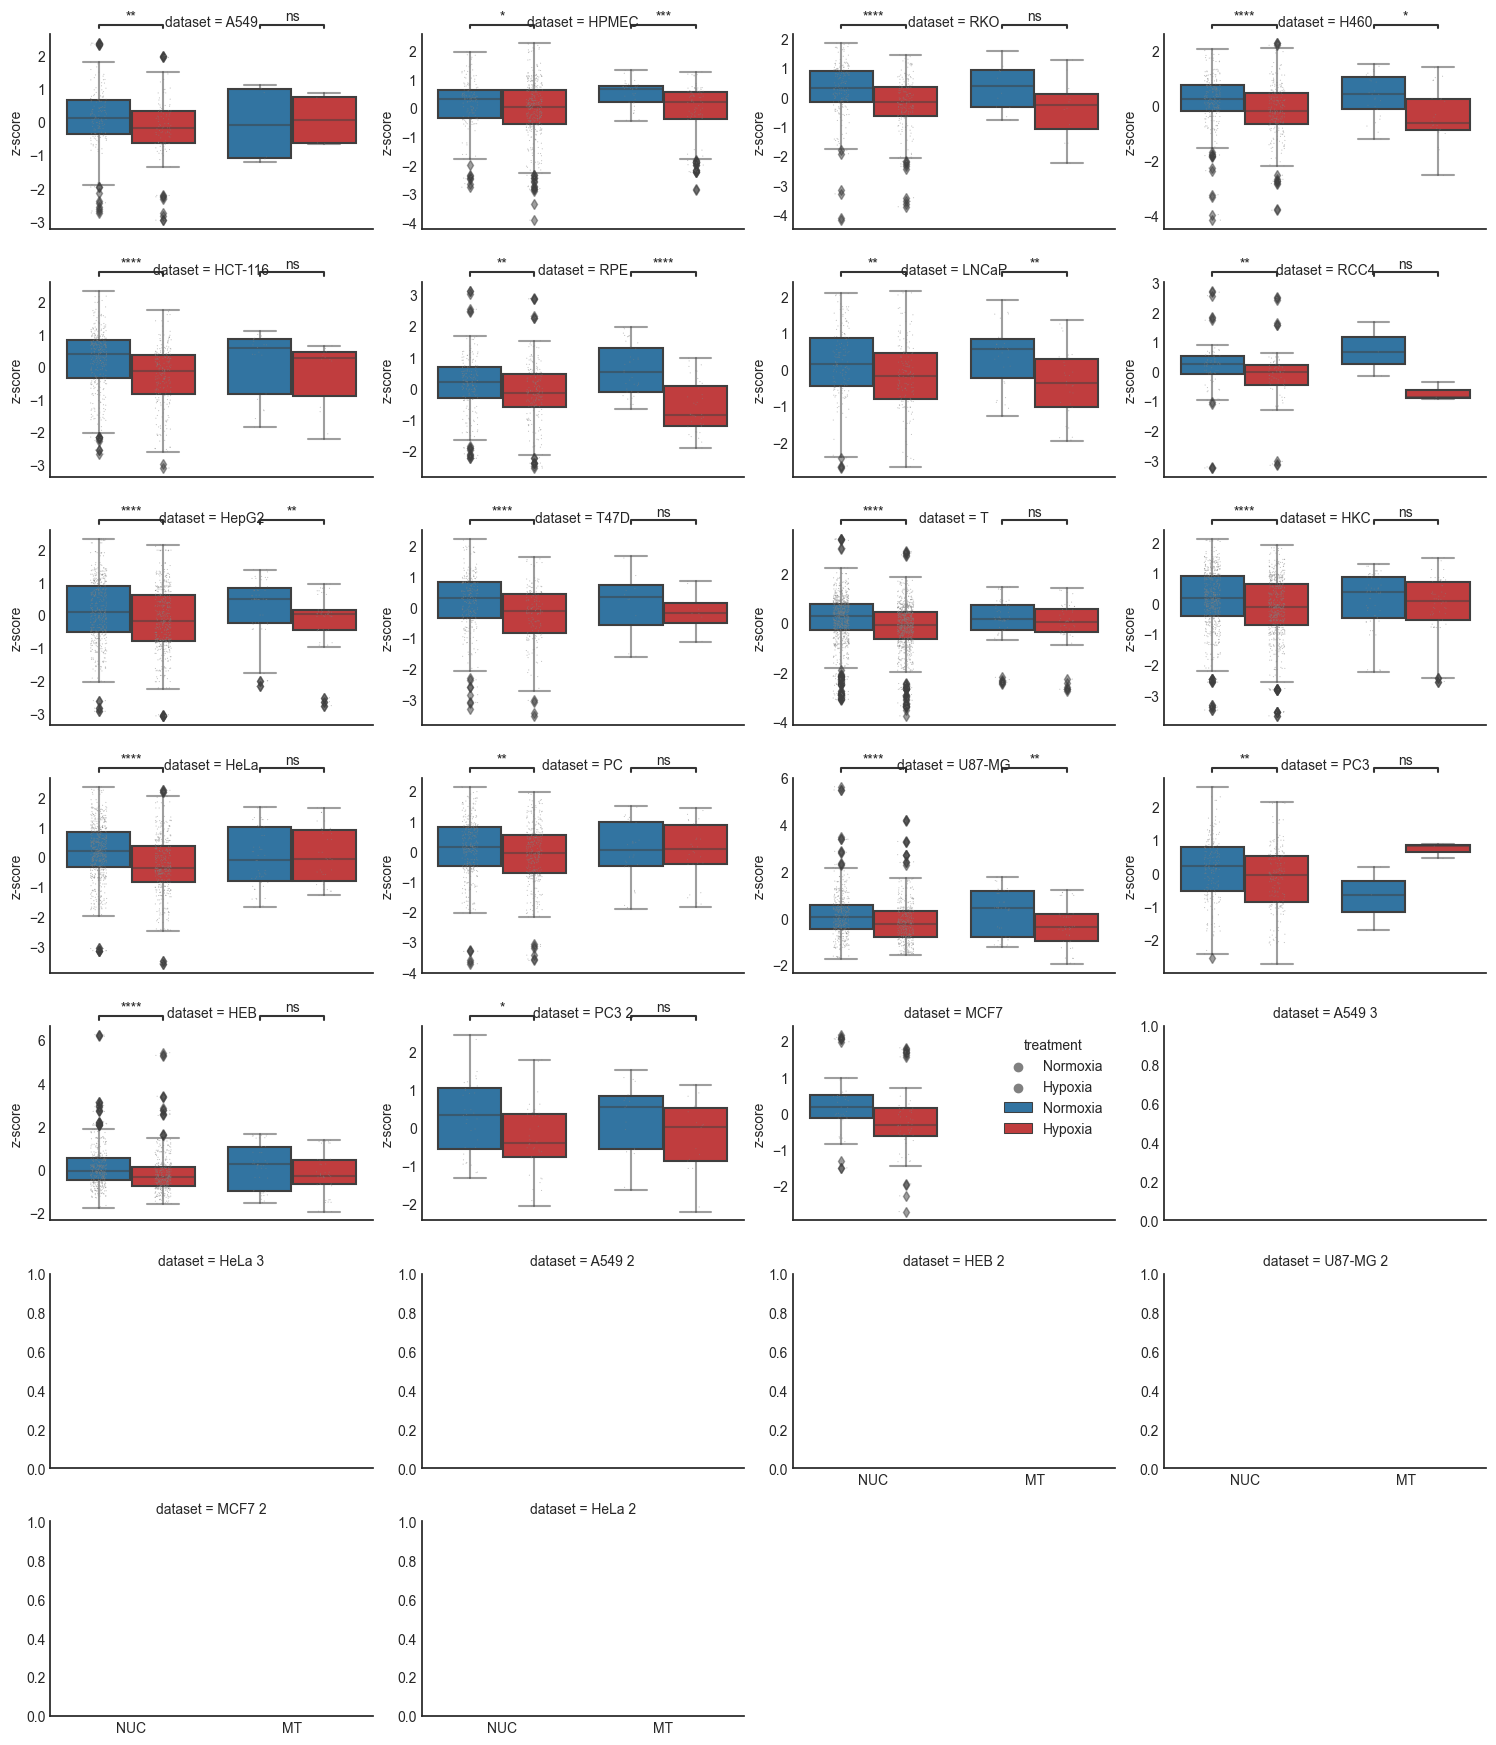

In [ ]:
import numpy as np
import pandas as pd
import statannot
import seaborn as sns
import matplotlib.pyplot as plt
# Choose style
plt.style.use('seaborn-white')
# define custom plotting function
def custom_boxplot(*args, **kwargs):
    # Add stripplot with low alpha
    ax = sns.stripplot(*args, **kwargs, palette=['grey', 'grey'], alpha = 0.05, size = .8)
    # Add boxplot with low alpha
    ax = sns.boxplot(*args, **kwargs, palette=['tab:blue', 'tab:red'])
    # Set the alpha of the points and errorbars to 0.5
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)
    statannot.add_stat_annotation(
        ax, plot='boxplot',
        data=kwargs['data'], x=kwargs['x'], y=kwargs['y'], hue = kwargs['hue'],
        box_pairs=pairs_box, order = kwargs['order'],
        test='Mann-Whitney', text_format='star', verbose=0, loc = 'outside'
    )
g = sns.FacetGrid(oxphos_counts_sign, col='dataset', col_wrap = 4, sharey = False, sharex = True, height = 2.5, aspect = 1.5)
# Add a strip catplot to show the number of genes in each cell line, genome, and treatment combination
g.map_dataframe(custom_boxplot, x='Genome', y='z-score', hue = 'treatment', dodge = True,  order = ['NUC', 'MT'], hue_order = ['Normoxia', 'Hypoxia'])
g.set_titles('{col_name}', size = 11, y = 0.8)
g.set_axis_labels('', 'Scaled Expression')
# Add legend
g.add_legend(title = 'Genome', bbox_to_anchor = (1, 1), loc = 'center')
# Save fig
#plt.savefig(os.path.join(PATH, 'figures', 'oxphos_ribo_mt_nuc_coexpression_all_datasets.jpg'), dpi = 300, bbox_inches = 'tight')

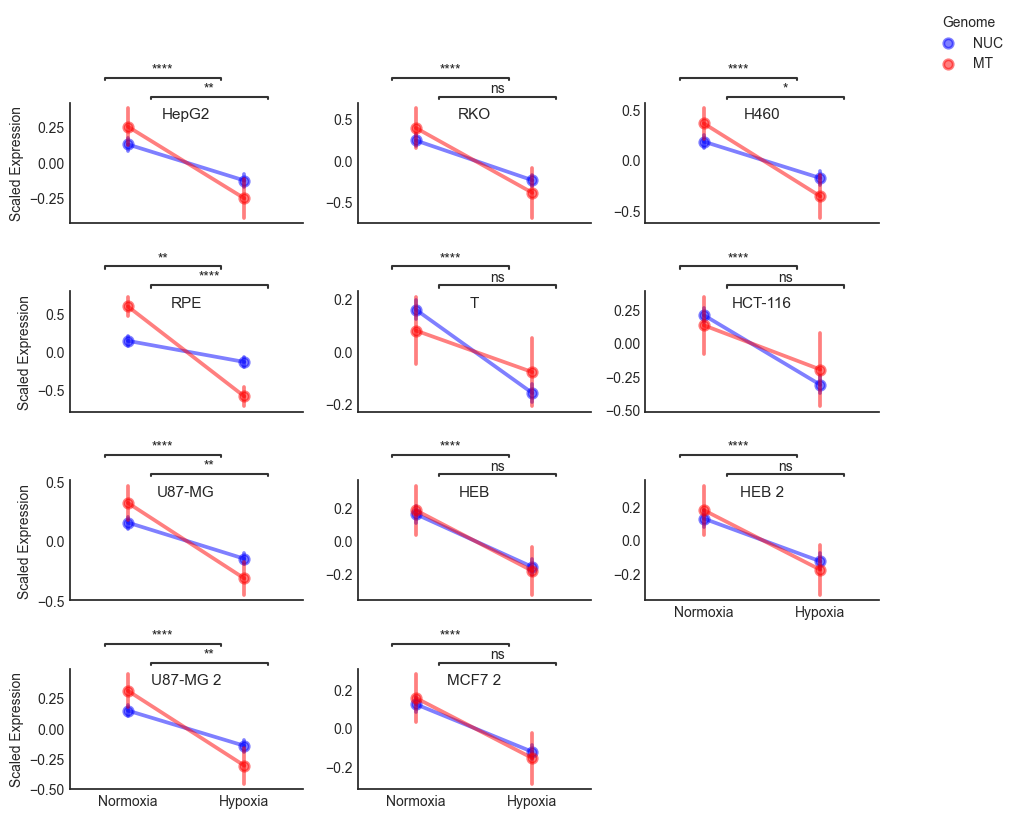

In [ ]:
import numpy as np
import pandas as pd
import statannot
import seaborn as sns
import matplotlib.pyplot as plt
# define custom plotting function

def custom_boxplot(*args, **kwargs):
    ax = sns.pointplot(*args, **kwargs, palette=['blue', 'red'])
    # Set the alpha of the points and errorbars to 0.5
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)
    statannot.add_stat_annotation(
        ax, plot='boxplot',
        data=kwargs['data'], x=kwargs['x'], y=kwargs['y'], hue = kwargs['hue'],
        box_pairs=pairs, order = kwargs['order'],
        test='Mann-Whitney', text_format='star', verbose=0, loc = 'outside'
    )
g = sns.FacetGrid(oxphos_counts_int, col='dataset', col_wrap = 3, sharey = False, sharex = True, height = 2, aspect = 1.5)
# Add a strip catplot to show the number of genes in each cell line, genome, and treatment combination
g.map_dataframe(custom_boxplot, x='treatment', y='z-score', hue = 'Genome', dodge = False, errorbar = 'se', order = ['Normoxia', 'Hypoxia'])
g.set_titles('{col_name}', size = 11, y = 0.8)
g.set_axis_labels('', 'Scaled Expression')
# Add legend
g.add_legend(title = 'Genome', bbox_to_anchor = (1, 1), loc = 'center')
# Remove grid
g.despine(left = False)
# Save fig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_ribo_mt_nuc_coexpression_per_dataset_coord.jpg'), dpi = 300, bbox_inches = 'tight')

In [ ]:
oxphos_counts_int[oxphos_counts_int['dataset'] == 'U87-MG'].groupby(['treatment', 'Genome']).agg({'z-score' : 'mean'})

z-score
treatment Genome          
Hypoxia   MT     -0.317300
          NUC    -0.151953
Normoxia  MT      0.317300
          NUC     0.151953

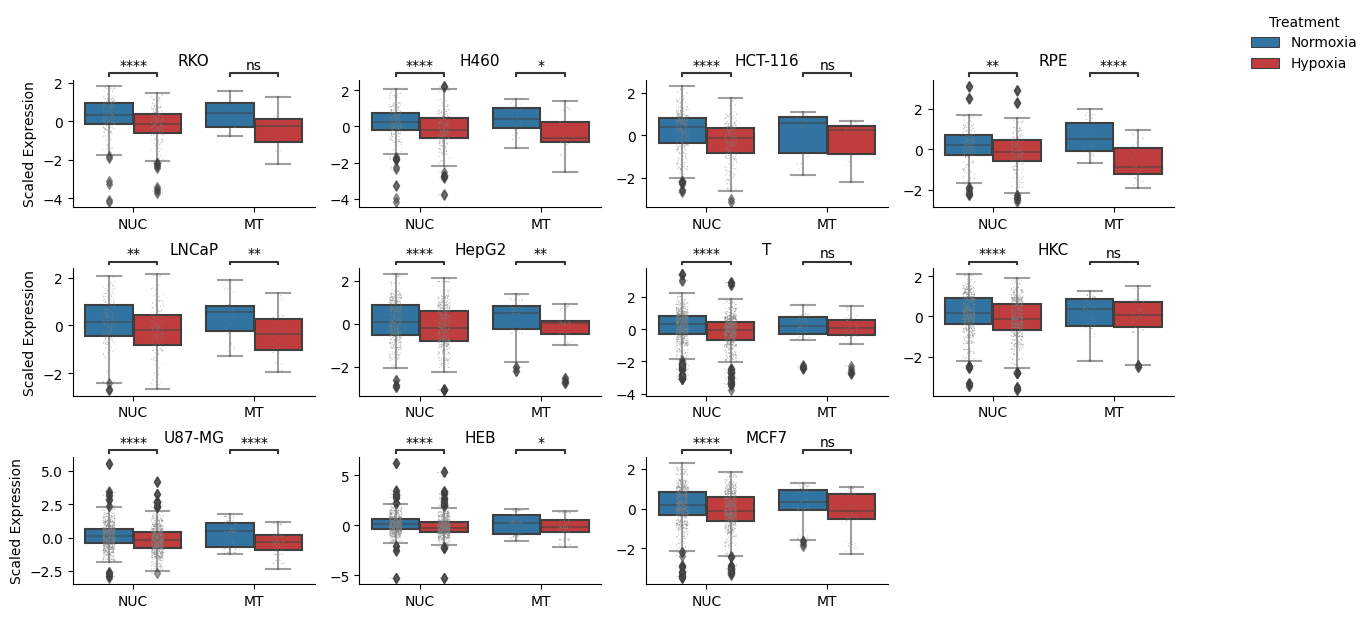

In [ ]:
import numpy as np
import pandas as pd
import statannot
import seaborn as sns
import matplotlib.pyplot as plt
# define custom plotting function

def custom_boxplot(*args, **kwargs):
    
 
    # Add stripplot with low alpha
    ax = sns.stripplot(*args, **kwargs, palette=['grey', 'grey'], alpha = 0.05, size = .8)
    # Add boxplot with low alpha
    ax = sns.boxplot(*args, **kwargs, palette=['tab:blue', 'tab:red'])
    # Set the alpha of the points and errorbars to 0.5
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)
    statannot.add_stat_annotation(
        ax, plot='boxplot',
        data=kwargs['data'], x=kwargs['x'], y=kwargs['y'], hue = kwargs['hue'],
        box_pairs=pairs_box, order = kwargs['order'],
        test='Mann-Whitney', text_format='star', verbose=0, loc = 'outside'
    )
g = sns.FacetGrid(oxphos_counts_int, col='cell_type', col_wrap = 4, sharey = False, sharex = False, height = 2, aspect = 1.5)
# Add a strip catplot to show the number of genes in each cell line, genome, and treatment combination
g.map_dataframe(custom_boxplot, x='Genome', y='z-score', hue = 'treatment', dodge = True, order = ['NUC', 'MT'], hue_order = ['Normoxia', 'Hypoxia'])
g.set_titles('{col_name}', size = 11, y = 1.05)
g.set_axis_labels('', 'Scaled Expression')
# Add legend
g.add_legend(title = 'Treatment', bbox_to_anchor = (1, 1), loc = 'center')
# Remove grid
g.despine(left = False)
# Save fig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_ribo_mt_nuc_coexpression_per_dataset_coord_box.jpg'), dpi = 300, bbox_inches = 'tight')

In [ ]:
datasets_for_cp = ['HepG2']
oxphos_counts_cp = oxphos_counts_sign[oxphos_counts_sign['dataset'].isin(datasets_for_cp)]

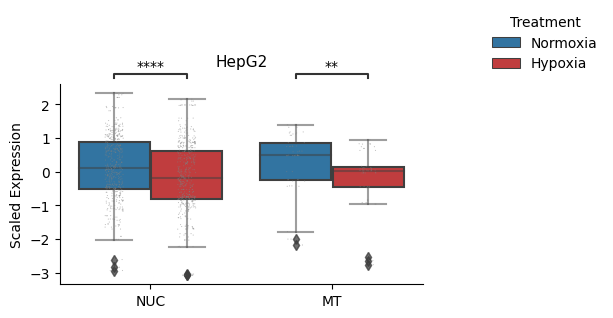

In [ ]:
g = sns.FacetGrid(oxphos_counts_cp, col='dataset', col_wrap = 1, sharey = False, sharex = False, height = 3, aspect = 1.5)
# Add a strip catplot to show the number of genes in each cell line, genome, and treatment combination
g.map_dataframe(custom_boxplot, x='Genome', y='z-score', hue = 'treatment', dodge = True, order = ['NUC', 'MT'], hue_order = ['Normoxia', 'Hypoxia'])
g.set_titles('{col_name}', size = 11, y = 1.05)
g.set_axis_labels('', 'Scaled Expression')
# Add legend
g.add_legend(title = 'Treatment', bbox_to_anchor = (1, 1), loc = 'center')
# Remove grid
g.despine(left = False)
# Save fig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_ribo_mt_nuc_coexpression_per_dataset_for_cp.jpg'), dpi = 300, bbox_inches = 'tight')

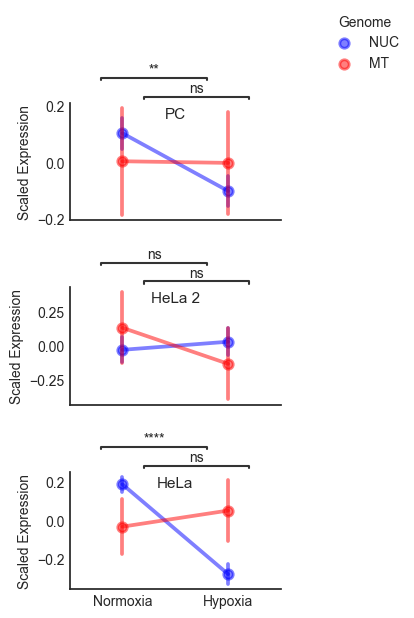

In [ ]:
import numpy as np
import pandas as pd
import statannot
import seaborn as sns
import matplotlib.pyplot as plt
# define custom plotting function

def custom_boxplot(*args, **kwargs):
    ax = sns.pointplot(*args, **kwargs, palette=['blue', 'red'])
    # Set the alpha of the points and errorbars to 0.5
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)
    statannot.add_stat_annotation(
        ax, plot='boxplot',
        data=kwargs['data'], x=kwargs['x'], y=kwargs['y'], hue = kwargs['hue'],
        box_pairs=pairs, order = kwargs['order'],
        test='Mann-Whitney', text_format='star', verbose=0, loc = 'outside'
    )
g = sns.FacetGrid(oxphos_counts_uncoord, col='dataset', col_wrap = 1, sharey = False, sharex = True, height = 2, aspect = 1.5)
# Add a strip catplot to show the number of genes in each cell line, genome, and treatment combination
g.map_dataframe(custom_boxplot, x='treatment', y='z-score', hue = 'Genome', dodge = False, errorbar = 'se', order = ['Normoxia', 'Hypoxia'])
g.set_titles('{col_name}', size = 11, y = 0.8)
g.set_axis_labels('', 'Scaled Expression')
# Add legend
g.add_legend(title = 'Genome', bbox_to_anchor = (1, 1), loc = 'center')
# Remove grid
g.despine(left = False)
# Save fig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_ribo_mt_nuc_coexpression_per_dataset_uncoord.jpg'), dpi = 300, bbox_inches = 'tight')

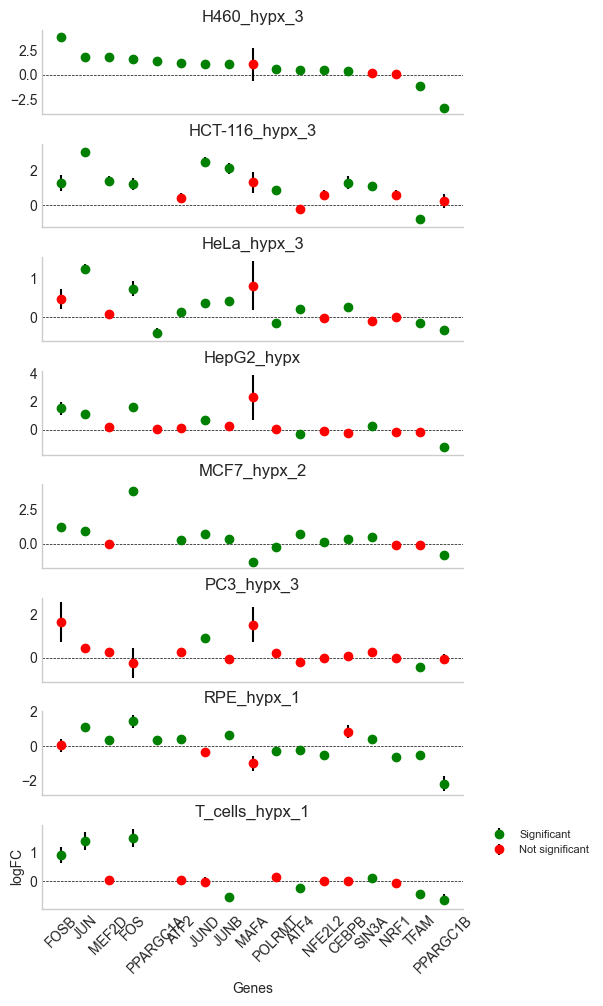

In [ ]:
# Split results_df by cell_type
reload(utils)
results_df['cell_type'] = results_df['dataset'].str.split('_').str[0]
filtered_results_df = results_df[(results_df.cell_type.isin(interesting_cells)) & (~results_df.dataset.isin(unwanted_datasets))]
TFS = ['FOS', 'FOSB', 'JUNB', 'ATF4', 'FRA1', 'FRA2', 'MAFA', 'CEBPB', 'PPARGC1A', 'PPARGC1B', 'NRF1', 'NFE2L2' ,'JUN', 'JUND', 'ATF2', 'TFAM', 'AMPK', 'TORC', 'SIN3A', 'POLRMT', 'MEF2D']

split_results_df = [i for i in filtered_results_df.groupby('dataset')]
utils.plot_gene_list(dfs = [i[1] for i in split_results_df], prefixes = ['' for i in split_results_df], names = [i[0] for i in split_results_df], gene_list = TFS, gene_list_name='test', figsize = (6, 10), against_bg=False, sign_only=False, savefig = True)

ValueError: min() arg is an empty sequence

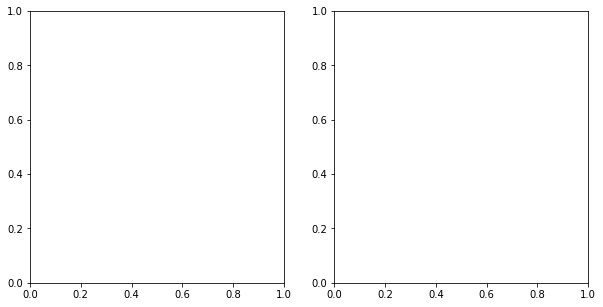

In [ ]:
hela_results_3 = results_df[results_df['dataset'] == 'HeLa_hypx_1_star']
hela_results_1 = results_df[results_df['dataset'] == 'HeLa_hypx_1']
ox_hela_results = hela_results_3[hela_results_3.Complex.notna()]
ox_hela_results_1 = hela_results_1[hela_results_1.Complex.isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])]
ox_hela_results_3 = hela_results_3[hela_results_3.Complex.isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])]
_, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = 'Genome', y = 'log2FoldChange', data = ox_hela_results_1, ax = ax[0])
sns.boxplot(x = 'Genome', y = 'log2FoldChange', data = ox_hela_results_3, ax = ax[1])
ax[0].set_title('HeLa Hypoxia 1')
ax[1].set_title('HeLa Hypoxia 1 Star ')


In [ ]:
# Load metadatas
metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'HeLa_hypx_3.csv'))
chip_metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'HeLa_chip.csv'))
atac_metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'HeLa_hypx_atac.csv'))
# Prepare counts
counts = pd.read_csv(os.path.join(PATH, 'data', 'combined_rna_seq', 'norm', 'norm_HeLa_hypx_3.csv'), index_col=0)
counts = counts.reset_index().melt(id_vars = 'index', value_name = 'counts', var_name = 'sample').rename(columns = {'index':'gene'})
counts = counts.merge(metadata, right_on = 'run_accession', left_on = 'sample').merge(consts.GENELIST_DF, left_on = 'gene', right_on = 'Name', how = 'left')
results = pd.read_csv(os.path.join(PATH, 'data', 'combined_rna_seq', 'results', 'res_HeLa_hypx_3.csv')).rename(columns = {'Unnamed: 0':'gene'})
counts.Genome = counts.Genome.fillna('NUC')
counts = counts[counts['cell_type'] == 'HeLa']
ox_counts = counts[counts['Complex'].notna()]
ox_counts['log2_counts'] = np.log2(ox_counts['counts'] + 1)
ox_counts['z-score'] = ox_counts.groupby(['Genome'])['counts'].transform(lambda x: (x - x.mean()) / x.std())
# Filter for significant genes based on results
ox_counts = ox_counts.merge(results[['gene', 'padj']], on = 'gene')
mcf7_ox_counts = oxphos_counts[oxphos_counts['dataset'] == 'MCF7 2']
mcf7_results = results_df[results_df['dataset'] == 'MCF7 2']
mcf7_ox_counts = mcf7_ox_counts.merge(mcf7_results[['gene', 'padj']], on = 'gene')
mcf7_ox_counts = mcf7_ox_counts[mcf7_ox_counts['padj'] < 0.05]

ox_counts = ox_counts[ox_counts['padj'] < 0.05]

# Load cp data
cp = pd.read_csv(os.path.join(PATH, 'data', 'cp_data', 'hela_cp.csv'))
rotem_atac_cp = pd.read_csv(os.path.join(PATH, 'data', 'cp_data', 'rotem_atac_cp.csv'))
cp_overlap = pd.read_csv(os.path.join(PATH, 'data', 'cp_data', 'hela_overlap_cp.csv'))
chip_cp = pd.read_csv(os.path.join(PATH, 'data', 'cp_data', 'hela_chip_cp.csv'))
cp['sample'] = cp['sample'].apply(lambda x: x.split('_')[0])
cp_overlap['sample'] = cp_overlap['sample'].apply(lambda x: x.split('_')[0])
chip_cp['sample'] = chip_cp['sample'].apply(lambda x: x.split('_')[0])
mt_cp = cp.merge(atac_metadata, right_on = 'run_accession', left_on = 'sample')
mt_cp_overlap = cp_overlap.merge(atac_metadata, right_on = 'run_accession', left_on = 'sample')
chip_cp = chip_cp.merge(chip_metadata, right_on = 'run_accession', left_on = 'sample')
mt_cp['cell_type'] = 'hela'
mt_cp_overlap['cell_type'] = 'hela'
chip_cp['cell_type'] = 'hela'
chip_cp = chip_cp[chip_cp['mt_mean'] > 500]
display(chip_cp.tail(2))


C:\Users\noam1\AppData\Local\Temp\ipykernel_5864\3348779037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ox_counts['log2_counts'] = np.log2(ox_counts['counts'] + 1)
C:\Users\noam1\AppData\Local\Temp\ipykernel_5864\3348779037.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ox_counts['z-score'] = ox_counts.groupby(['Genome'])['counts'].transform(lambda x: (x - x.mean()) / x.std())


,sample,mt_cp,mt_mean,mt_median,mt_std,ref_mean,ref_median,ref_std,run_accession,replicate,target,treatment,experiment,cell_type
29,SRR12781750,538.589097,988.662522,994.0,189.258325,1.835653,1.0,1.317291,SRR12781750,S16,HIF1B,Hypoxia,Input,hela
35,SRR12781746,594.858442,1315.707956,1316.0,277.295773,2.211800,2.0,1.831430,SRR12781746,S14,Control,Hypoxia,Input,hela


In [ ]:
# Load fastmitocp data
hela_fastmito_chip_cp = pd.read_csv(os.path.join(PATH, 'data', 'fastmito_cp_data', 'HeLa_chip.csv')).rename({'copy_number_avg' : 'mt_cp'}, axis = 1)
hela_fastmito_atac_cp = pd.read_csv(os.path.join(PATH, 'data', 'fastmito_cp_data', 'HeLa_hypx_atac.csv')).rename({'copy_number_avg' : 'mt_cp'}, axis = 1)
mcf7_fastmito_atac_cp = pd.read_csv(os.path.join(PATH, 'data', 'fastmito_cp_data', 'MCF7_hypx_atac.csv')).rename({'copy_number_avg' : 'mt_cp'}, axis = 1)
# Split sample_title by '_' into treatment, replicate and tech_replicate
mcf7_fastmito_atac_cp[['treatment', 'replicate', 'tech_replicate']] = mcf7_fastmito_atac_cp['sample_title'].str.split('_', expand = True)
# Drop sample_title
mcf7_fastmito_atac_cp = mcf7_fastmito_atac_cp.drop('sample_title', axis = 1)
hela_fastmito_chip_cp = hela_fastmito_chip_cp.merge(chip_metadata, right_on = 'run_accession', left_on = 'sample')
hela_fastmito_atac_cp = hela_fastmito_atac_cp.merge(atac_metadata, right_on = 'run_accession', left_on = 'sample')
hela_fastmito_atac_cp.loc[hela_fastmito_atac_cp['hypx_time'] == 'Reox', 'title'] = 'Control'
display(mcf7_fastmito_atac_cp.head(2))

,sample,mt_cp,mt_coverage,autosomal_coverage,bp_covered,chroms_used,treatment,replicate,tech_replicate
0,SAMN12139318,23987.0,5332.23,0.444593,2984000,122,Hypoxia,rep3,tech2
1,SAMN12139319,28243.9,4852.21,0.343593,2987000,122,Hypoxia,rep3,tech1


In [ ]:
rotem_atac_cp = rotem_atac_cp[rotem_atac_cp['sample'].str.startswith('H')]
def treatment(x):
    if x[1] == 'H':
        return 'Hypoxia'
    elif x[1] == 'C':
        return 'Normoxia'
    else:
        return 'Unknown'
def cell_type(x):
    if x.startswith('H'):
        return 'hela'
    elif x.startswith('D'):
        return 'd407'
    else:
        return 'Unknown'
rotem_atac_cp['treatment'] = rotem_atac_cp['sample'].apply(treatment)
rotem_atac_cp['cell_type'] = rotem_atac_cp['sample'].apply(cell_type)


In [ ]:
# Calculate z-score of cp values per sample
mt_cp['z_score'] = mt_cp.groupby(['cell_type'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
mt_cp_overlap['z_score'] = mt_cp_overlap.groupby(['cell_type'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
chip_cp['z_score'] = chip_cp.groupby(['experiment', 'target'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
rotem_atac_cp['z_score'] = rotem_atac_cp.groupby(['treatment'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
hela_fastmito_chip_cp['z_score'] = hela_fastmito_chip_cp.groupby(['experiment', 'target'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
hela_fastmito_atac_cp['z_score'] = hela_fastmito_atac_cp.groupby(['replicate'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
mcf7_fastmito_atac_cp['z_score'] = mcf7_fastmito_atac_cp.groupby(['replicate'])['mt_cp'].transform(lambda x: (x - x.mean())/x.std())
display(hela_fastmito_atac_cp[hela_fastmito_atac_cp['replicate'] == 'rep2'])
#mt_cp_overlap = mt_cp_overlap.dropna()

,sample,mt_cp,mt_coverage,autosomal_coverage,bp_covered,chroms_used,run_accession,hypx_time,treatment,title,replicate,z_score
4,SRR16525213,3559.90,3753.77,2.10892,2985000.0,122.0,SRR16525213,24h,Hpx,siHIF1β,rep2,-0.385132
5,SRR16525209,3357.67,4634.51,2.76055,2985000.0,122.0,SRR16525209,1h,Hpx,siHIF1β,rep2,-0.885449
6,SRR16525203,3857.87,4872.38,2.52594,2988000.0,122.0,SRR16525203,0h,Hpx,Control,rep2,0.352047
8,SRR16525215,4123.90,4698.81,2.27882,2994000.0,122.0,SRR16525215,Reox,Hpx,Control,rep2,1.010206
9,SRR16525211,3221.20,3674.43,2.28140,2993000.0,122.0,SRR16525211,24h,Hpx,Control,rep2,-1.223076
11,SRR16525205,4326.33,4295.16,1.98559,2990000.0,122.0,SRR16525205,0h,Hpx,siHIF1β,rep2,1.511019
13,SRR16525207,3562.13,4623.40,2.59586,2988000.0,122.0,SRR16525207,1h,Hpx,Control,rep2,-0.379615


C:\Users\noam1\AppData\Local\Temp\ipykernel_5864\3664470906.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


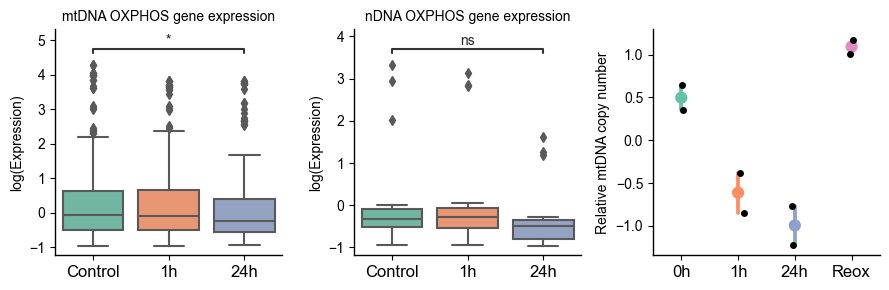

In [ ]:
order = ['0h','1h', '24h', 'Reox']
counts_order = ['Control', '1h', '24h']
pairs = [('0h', '1h'), ('0h', '24h'), ('0h', 'Reox'), ('1h', '24h'), ('1h', 'Reox'), ('24h', 'Reox')]
pairs = [('0h', '24h')]
pairs_counts = [('Control', '24h')]
pairs_chip_cp = [('Normoxia', 'Hypoxia')]
order_chip_cp = ['Normoxia', 'Hypoxia']
mt_ox_counts = ox_counts[ox_counts['Genome'] == 'MT']
nuc_ox_counts = ox_counts[ox_counts['Genome'] == 'NUC']
fig, ax = plt.subplots(1, 3, figsize = (9, 3), sharex=False)
# Set style to whitegrid
plt.style.use('seaborn-whitegrid')
sns.boxplot(data = mt_ox_counts, x = 'treatment', y = 'z-score', ax = ax[1], palette = 'Set2', order = counts_order)
sns.boxplot(data = nuc_ox_counts, x = 'treatment', y = 'z-score', ax = ax[0], palette = 'Set2', order = counts_order)


sns.pointplot(data = hela_fastmito_atac_cp[hela_fastmito_atac_cp['title'] == 'Control'], x = 'hypx_time', y = 'z_score', ax = ax[2], palette = 'Set2',order = order)
sns.stripplot(data = hela_fastmito_atac_cp[hela_fastmito_atac_cp['title'] == 'Control'], x = 'hypx_time', y = 'z_score', color = 'black', ax = ax[2], order = order)
# Despine
sns.despine()
# Remove grid
ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
# Increase x tick font size
ax[0].tick_params(axis = 'x', labelsize = 12)
ax[1].tick_params(axis = 'x', labelsize = 12)
ax[2].tick_params(axis = 'x', labelsize = 12)
# Add x and y labels

ax[0].set_xlabel('')
ax[0].set_ylabel('log(Expression)')
ax[1].set_xlabel('')
ax[1].set_ylabel('log(Expression)')
ax[2].set_xlabel('')
ax[2].set_ylabel('Relative mtDNA copy number')  
# Add title
ax[0].set_title('mtDNA OXPHOS gene expression', size = 10)  
ax[1].set_title('nDNA OXPHOS gene expression', size = 10)
# Add stat annotation
add_stat_annotation(ax[1], data=mt_ox_counts, x='treatment', y='z-score', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
add_stat_annotation(ax[0], data=nuc_ox_counts, x='treatment', y='z-score', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
#add_stat_annotation(ax[2], data=hela_fastmito_atac_cp, x='hypx_time', y='mt_cp', order=order, box_pairs=pairs, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
# Despine
sns.despine()
# Increase axe line width and set black color
for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(1)
    ax[0].spines[axis].set_color('black')
    ax[1].spines[axis].set_linewidth(1)
    ax[1].spines[axis].set_color('black')
    ax[2].spines[axis].set_linewidth(1)
    ax[2].spines[axis].set_color('black')
# Savefig
plt.tight_layout()
plt.savefig(os.path.join(PATH, 'figures', 'mt_gene_expression_vs_cp_hela.png'), dpi = 300, bbox_inches = 'tight')


In [ ]:
mcf7_fastmito_atac_cp

,sample,mt_cp,mt_coverage,autosomal_coverage,bp_covered,chroms_used,treatment,replicate,tech_replicate,z_score
0,SAMN12139318,23987.0,5332.23,0.444593,2984000,122,Hypoxia,rep3,tech2,-0.754064
1,SAMN12139319,28243.9,4852.21,0.343593,2987000,122,Hypoxia,rep3,tech1,-0.681355
2,SAMN12139320,21743.5,6822.78,0.627569,2984000,122,Hypoxia,rep2,tech2,-0.672032
3,SAMN12139321,25723.3,5731.11,0.445597,2991000,122,Hypoxia,rep2,tech1,-0.477175
4,SAMN12139322,41487.5,4902.26,0.236325,2986000,122,Hypoxia,rep1,tech2,-1.152361
5,SAMN12139324,150228.0,4560.57,0.060715,2984000,122,Normoxia,rep3,tech2,1.402154
6,SAMN12139325,70083.1,9084.51,0.259249,2986000,122,Normoxia,rep3,tech1,0.033265
7,SAMN12139326,58940.9,6366.01,0.216013,2991000,122,Normoxia,rep2,tech2,1.149207
8,SAMN12139327,99648.3,5586.04,0.112115,2988000,122,Normoxia,rep1,tech2,0.639805
9,SAMN12139328,95518.7,6565.40,0.137468,2982000,122,Normoxia,rep1,tech1,0.512556


C:\Users\noam1\AppData\Local\Temp\ipykernel_5864\1149597134.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


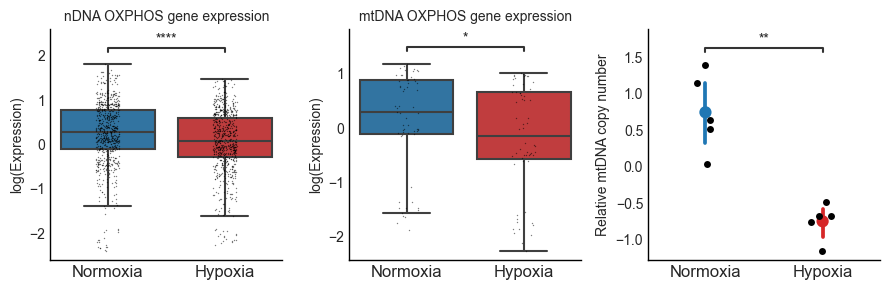

In [ ]:
counts_order = ['Normoxia', 'Hypoxia']
pairs_counts = [('Normoxia', 'Hypoxia')]

mt_ox_counts = mcf7_ox_counts[mcf7_ox_counts['Genome'] == 'MT']
nuc_ox_counts = mcf7_ox_counts[mcf7_ox_counts['Genome'] == 'NUC']
fig, ax = plt.subplots(1, 3, figsize = (9, 3), sharex=True)
# Set style to whitegrid
plt.style.use('seaborn-whitegrid')
sns.boxplot(data = mt_ox_counts, x = 'treatment', y = 'z-score', ax = ax[1], palette = ['tab:blue', 'tab:red'], order = counts_order, showfliers = False)
sns.boxplot(data = nuc_ox_counts, x = 'treatment', y = 'z-score', ax = ax[0], palette = ['tab:blue', 'tab:red'], order = counts_order, showfliers = False)
sns.stripplot(data = mt_ox_counts, x = 'treatment', y = 'z-score', color = 'black', ax = ax[1], order = counts_order, dodge = False, s = 1, alpha = .5)
sns.stripplot(data = nuc_ox_counts, x = 'treatment', y = 'z-score', color = 'black', ax = ax[0], order = counts_order, dodge = False, s = 1, alpha = .5)


sns.pointplot(data = mcf7_fastmito_atac_cp, x = 'treatment', y = 'z_score', ax = ax[2], palette = ['tab:blue', 'tab:red'],order = counts_order, )
sns.stripplot(data = mcf7_fastmito_atac_cp, x = 'treatment', y = 'z_score', color = 'black', ax = ax[2], order = counts_order, dodge = False, )
# Despine
sns.despine()
# Remove grid
ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
# Increase x tick font size
ax[0].tick_params(axis = 'x', labelsize = 12)
ax[1].tick_params(axis = 'x', labelsize = 12)
ax[2].tick_params(axis = 'x', labelsize = 12)
# Add x and y labels

ax[0].set_xlabel('')
ax[0].set_ylabel('log(Expression)')
ax[1].set_xlabel('')
ax[1].set_ylabel('log(Expression)')
ax[2].set_xlabel('')
ax[2].set_ylabel('Relative mtDNA copy number')  

# Add title
ax[0].set_title('nDNA OXPHOS gene expression', fontsize = 10)  
ax[1].set_title('mtDNA OXPHOS gene expression', fontsize = 10)
# Add stat annotation
add_stat_annotation(ax[1], data=mt_ox_counts, x='treatment', y='z-score', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
add_stat_annotation(ax[0], data=nuc_ox_counts, x='treatment', y='z-score', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
add_stat_annotation(ax[2], data=mcf7_fastmito_atac_cp, x='treatment', y='z_score', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(1)
    ax[0].spines[axis].set_color('black')
    ax[1].spines[axis].set_linewidth(1)
    ax[1].spines[axis].set_color('black')
    ax[2].spines[axis].set_linewidth(1)
    ax[2].spines[axis].set_color('black')
# Rename the x labels of all figures to 'Control' and '24h'
#ax[0].set_xticklabels(['Control', '24h'])
#x[1].set_xticklabels(['Control', '24h'])
#ax[2].set_xticklabels(['Control', 'Hypoxia'])
# Savefig
plt.tight_layout()
plt.savefig(os.path.join(PATH, 'figures', 'mt_gene_expression_vs_cp_mcf7.png'), dpi = 300, bbox_inches = 'tight')


In [ ]:
hela_fastmito_chip_cp = hela_fastmito_chip_cp[hela_fastmito_chip_cp['experiment'] == 'Input']

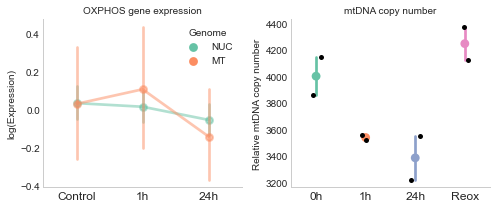

In [ ]:
order = ['0h','1h', '24h', 'Reox']
counts_order = ['Control', '1h', '24h']
pairs = [('0h', '1h'), ('0h', '24h'), ('0h', 'Reox'), ('1h', '24h'), ('1h', 'Reox'), ('24h', 'Reox')]
pairs = [('0h', '24h')]
pairs_counts = [('Control', '24h')]
pairs_chip_cp = [('Normoxia', 'Hypoxia')]
order_chip_cp = ['Normoxia', 'Hypoxia']
fig, ax = plt.subplots(1, 2, figsize = (7, 3), sharex=False)
# Set style to whitegrid
plt.style.use('seaborn-whitegrid')
sns.pointplot(data = ox_counts, x = 'treatment', y = 'z-score', hue = 'Genome', ax = ax[0], palette = 'Set2')
sns.pointplot(data = hela_fastmito_atac_cp[hela_fastmito_atac_cp['title'] == 'Control'], x = 'hypx_time', y = 'mt_cp', ax = ax[1], palette = 'Set2',order = order)
sns.stripplot(data = hela_fastmito_atac_cp[hela_fastmito_atac_cp['title'] == 'Control'], x = 'hypx_time', y = 'mt_cp', color = 'black', ax = ax[1], order = order)
# Despine
sns.despine()
# Remove grid
ax[0].grid(False)
ax[1].grid(False)
# Increase x tick font size
ax[0].tick_params(axis = 'x', labelsize = 12)
ax[1].tick_params(axis = 'x', labelsize = 12)
# Add x and y labels


ax[0].set_xlabel('')
ax[0].set_ylabel('log(Expression)')
ax[1].set_xlabel('')
ax[1].set_ylabel('Relative mtDNA copy number')  
# Add title
ax[0].set_title('OXPHOS gene expression', size = 10)  
ax[1].set_title('mtDNA copy number', size = 10)
# Add stat annotation
#add_stat_annotation(ax[0], data=mt_ox_counts, x='Genome', hue = 'treatment', y='z-score', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
#add_stat_annotation(ax[0], data=nuc_ox_counts, x='treatment', y='log2_counts', order=counts_order, box_pairs=pairs_counts, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
#add_stat_annotation(ax[2], data=hela_fastmito_atac_cp, x='hypx_time', y='mt_cp', order=order, box_pairs=pairs, test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
# Savefig
plt.tight_layout()
for ax in plt.gcf().axes[:1]:
    ax.grid(False)
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)
#plt.savefig(os.path.join(PATH, 'figures', 'mt_gene_expression_vs_cp_hela.png'), dpi = 300, bbox_inches = 'tight')


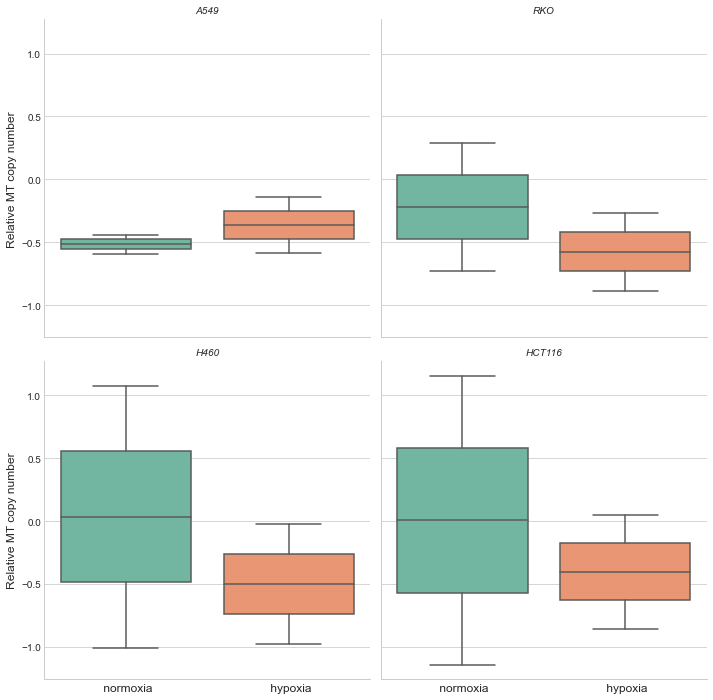

In [ ]:
cat = sns.catplot(mt_cp_overlap, x = 'treatment', y = 'z_score', col = 'cell_type', col_wrap =2, kind = 'box', palette = 'Set2', order = [' normoxia',' hypoxia'])
# Set labels for all subplots
cat.set_axis_labels('', 'Relative MT copy number', fontsize = 12)
# Increase the font size of x labels
cat.set_xticklabels(fontsize = 12)
# Set titles for all subplots
cat.set_titles('{col_name}', fontstyle = 'italic', fontsize = 200)
# Despine
sns.despine()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'mt_cp_per_cell.png'), dpi = 300, bbox_inches = 'tight')


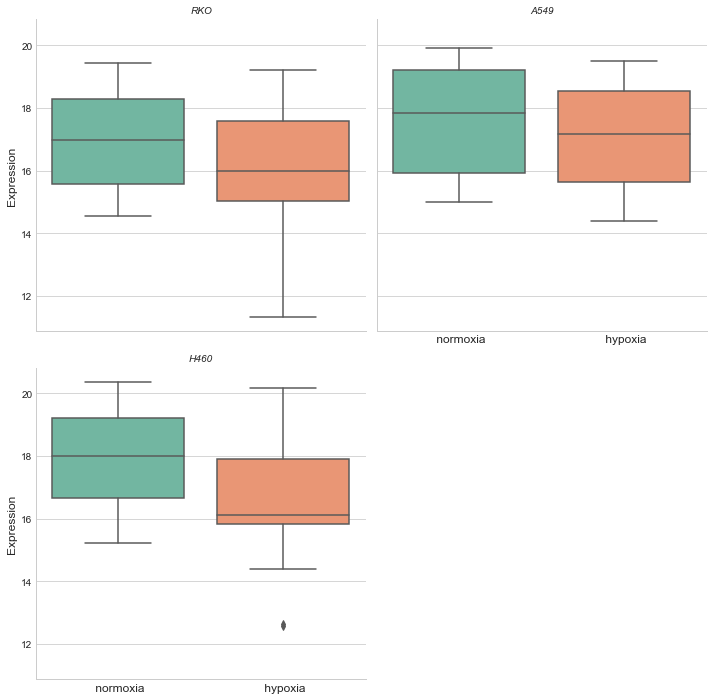

In [ ]:
cat = sns.catplot( ox_counts[ox_counts['Genome'] == 'MT'], x = 'treatment', y = 'counts', col = 'cell_type', col_wrap =2, kind = 'box', palette = 'Set2', order = [' normoxia',' hypoxia'])
# Set labels for all subplots
cat.set_axis_labels('', 'Expression', fontsize = 12)
# Increase the font size of x labels
cat.set_xticklabels(fontsize = 12)
# Set titles for all subplots
cat.set_titles('{col_name}', fontstyle = 'italic', fontsize = 200)
# Despine
sns.despine()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'mt_expr_per_cell.png'), dpi = 300, bbox_inches = 'tight')


In [ ]:
# Rotem data analysis

metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'rotem_atac_seq.csv'))
cp_data = pd.read_csv(os.path.join(PATH, 'data', 'cp_data', 'rotem_atac_cp.csv'))
metadata = metadata.replace(regex = True, to_replace = '\.\d', value = r'')
# Add _ between letters and numbers in sample name
metadata['sample'] = metadata['sample'].str.replace(r'(\d+)', r'_\1')
cp_data['sample'] = cp_data.replace(regex = True, to_replace = r'_.*', value = r'')
cp_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\noam1\\Desktop\\Hypoxia\\data\\metadata\\rotem_atac_seq.csv'

In [ ]:
cp_data

,sample,mt_cp,mt_mean,mt_median,mt_std,ref_mean,ref_median,ref_std
0,DG_1,13364.236838,16770.181232,17311.0,5190.569187,1.254855,1.0,0.608472
1,HC_3_1_4_HS,31604.782163,38891.658456,40270.0,11739.771548,1.230562,1.0,0.538817
2,DG_2,22321.792536,25626.785865,26927.0,7389.083962,1.148061,1.0,0.408225
3,g2_1_10_HS,31322.594501,63940.003115,67324.0,17953.735484,2.041338,2.0,1.458744
4,HH_3_2_19_HS,23417.304730,27932.822453,28958.0,8407.274731,1.192828,1.0,0.497040
5,g1_2_2_HS,19675.444161,24987.505318,26040.0,7263.515467,1.269984,1.0,0.595977
6,DC_2,18882.059502,23194.303404,24473.0,6622.433089,1.228378,1.0,0.529396
7,C_2,21671.101001,29505.581465,30702.5,8875.386241,1.361517,1.0,0.730550
8,DH_1,21472.328367,27603.271099,28571.5,8373.823659,1.285528,1.0,0.631751
9,c2_2_11_HS,71758.594276,167480.750034,174995.0,48103.558356,2.333947,2.0,1.778551


In [ ]:
metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'rna-seq_19-09-23_all.csv'), index_col = 0)
metadata2 = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'hypx_u87_1.csv'), index_col = 0)
norm = pd.read_csv(os.path.join(PATH, 'data', 'rld', 'rld_U87_biorep3.csv'),index_col = 0).reset_index().melt(id_vars = 'index', value_name = 'counts', var_name = 'sample').rename(columns = {'index':'gene'})
norm2 = pd.read_csv(os.path.join(PATH, 'data', 'combined_rna_seq', 'rld', 'rld_U87_hypx_1.csv'),index_col = 0).reset_index().melt(id_vars = 'index', value_name = 'counts', var_name = 'sample').rename(columns = {'index':'gene'})
# Rename sample column
norm = norm.merge(metadata, left_on = 'sample', right_index = True)
norm2 = norm2.merge(metadata2, left_on = 'sample', right_index = True)
display(norm.head())
display(norm2.head())

# Plot MT gene expression for each treatment


,gene,sample,counts,treatment,replicate
0,TSPAN6,AC,11.032442,Control,A
1,DPM1,AC,11.676745,Control,A
2,SCYL3,AC,9.084097,Control,A
3,C1orf112,AC,9.955220,Control,A
4,CFH,AC,8.627041,Control,A


,gene,sample,counts,cell,condition,replicate
0,TSPAN6,SRR3129715,11.803319,U87-MG,normoxia,rep1
1,DPM1,SRR3129715,12.308851,U87-MG,normoxia,rep1
2,SCYL3,SRR3129715,11.386708,U87-MG,normoxia,rep1
3,C1orf112,SRR3129715,11.488473,U87-MG,normoxia,rep1
4,FGR,SRR3129715,11.164343,U87-MG,normoxia,rep1


In [ ]:
mouse_metadata

,sample_accession,cell_type,ox_conc,replicate,method
0,SAMN27567837,GL261-GFP,<0.1%O2,rep2,ATACseq
1,SAMN27567840,GL261-GFP,1%O2,rep1,ATACseq
2,SAMN27567841,GL261-GFP,21%O2,rep2,ATACseq
3,SAMN27567839,GL261-GFP,1%O2,rep2,ATACseq
4,SAMN27567838,GL261-GFP,<0.1%O2,rep1,ATACseq
5,SAMN27567842,GL261-GFP,21%O2 rep1,ATACseq,NaN


C:\Users\noam1\AppData\Local\Temp\ipykernel_21404\426304643.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data = mouse_cp_combined, x = 'ox_conc', y = 'z_score', kind = 'swarm', palette = 'Set2', order = ['21%O2', '1%O2', '<0.1%O2'])


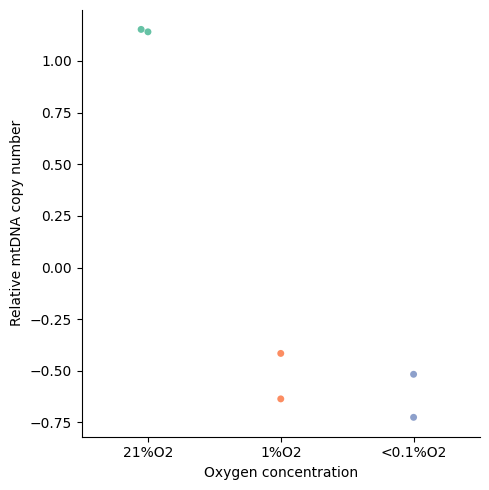

In [ ]:
mouse_cp = pd.read_csv(os.path.join(PATH, 'data', 'cp_data', 'mm_atac_hypx_glioma_cp.csv'))
mouse_metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'mm_atac_hypx_glioma.csv'))
# Replace 21%O2 rep1 with 21%O2
mouse_metadata['ox_conc'] = mouse_metadata['ox_conc'].replace('21%O2 rep1', '21%O2')
mouse_metadata.loc[mouse_metadata.replicate == 'ATACseq', 'replicate'] = 'rep1'
# merge metadata and cp data
mouse_cp_combined = mouse_cp.merge(mouse_metadata, left_on = 'sample', right_on = 'sample_accession')
# Add z-score per replicate 
mouse_cp_combined['z_score'] = mouse_cp_combined.groupby(['replicate'])['copy_number_avg'].transform(lambda x: (x - x.mean())/x.std())
# Plot the MT cp values for each treatment
sns.catplot(data = mouse_cp_combined, x = 'ox_conc', y = 'z_score', kind = 'swarm', palette = 'Set2', order = ['21%O2', '1%O2', '<0.1%O2'])

# Set x and y labels
plt.xlabel('Oxygen concentration')
plt.ylabel('Relative mtDNA copy number')
# Despine
sns.despine()
# Savefig

# Plot the MT cp values for each treatment




In [ ]:
up_in_hyp = pd.read_csv(os.path.join(PATH, 'data', 'hyp_genes', 'human18_hn2.tsv'),sep = '\t').sort_values(by = 'HN-score', ascending = False)
N = 20
topN = up_in_hyp.head(N)
# mkae topN a list
topN = list(topN['Gene'])


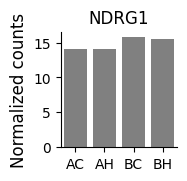

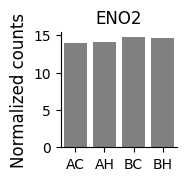

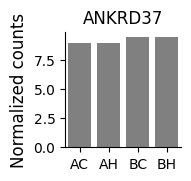

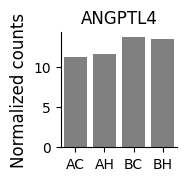

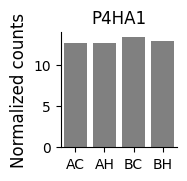

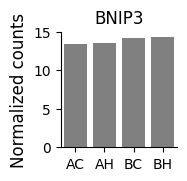

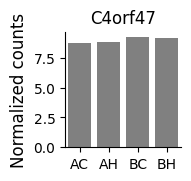

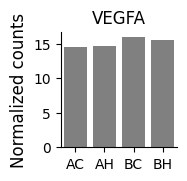

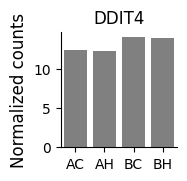

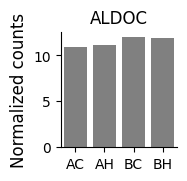

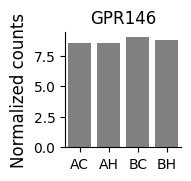

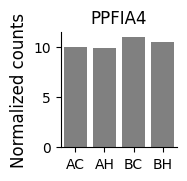

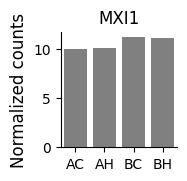

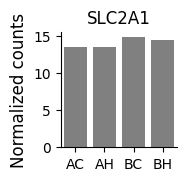

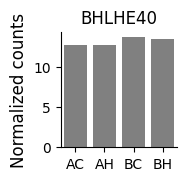

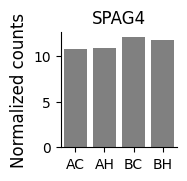

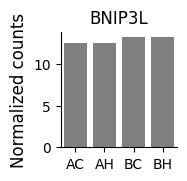

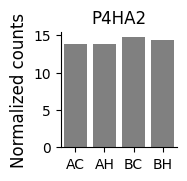

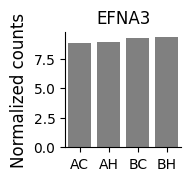

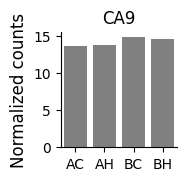

In [ ]:
import statannot
for gene in topN:
    _, ax = plt.subplots(figsize = (1.5, 1.5))
    sns.barplot(x = 'sample', y = 'counts', data = norm[norm.gene == gene], ax = ax, color = 'grey')
    conditions = norm[norm.gene == gene]['sample'].unique()
    pairs = [(conditions[i], conditions[j]) for i in range(len(conditions)) for j in range(i+1, len(conditions))]
    #statannot.add_stat_annotation(ax, data = norm[norm.gene == gene], x = 'sample', y = 'counts', box_pairs = pairs, test = 'Mann-Whitney', text_format = 'star', loc = 'inside', fontsize = 'large', verbose = 2, comparisons_correction = None)
    ax.set_title(gene)
    ax.set_ylabel('Normalized counts', fontsize = 12)
    ax.set_xlabel('')
    sns.despine()
    ax.grid(False)

In [ ]:
norm2.columns

Index(['gene', 'sample', 'counts', 'cell', 'condition', 'replicate'], dtype='object')

In [ ]:
import statannot
for gene in topN:
    _, ax = plt.subplots(figsize = (1.5, 1.5))
    sns.barplot(x = 'condition', y = 'counts', data = norm2[norm2.gene == gene], ax = ax, color = 'grey')
    conditions = norm2[norm2.gene == gene]['condition'].unique()
    pairs = [(conditions[i], conditions[j]) for i in range(len(conditions)) for j in range(i+1, len(conditions))]
    statannot.add_stat_annotation(ax, data = norm2[norm2.gene == gene], x = 'condition', y = 'counts', box_pairs = pairs, test = 'Mann-Whitney', text_format = 'star', loc = 'inside', fontsize = 'large', verbose = 2, comparisons_correction = None)
    ax.set_title(gene)
    ax.set_ylabel('Normalized counts', fontsize = 12)
    # Rotate x tick labels
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_xlabel('')
    sns.despine()
    ax.grid(False)

In [ ]:
# Working with the HUVEC time-course

# Load metadata
huvec_meta = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'HUVEC_hypx_rna.csv')).drop(columns = ['filler', 'replicate2', 'replicate3'])

# Load results
huvec_results = pd.read_csv(os.path.join(PATH, 'data', 'combined_rna_seq', 'results', 'res_HUVEC_rna_hypx.csv')).rename(columns = {'Unnamed: 0':'gene'})
# Load counts
huvec_counts = pd.read_csv(os.path.join(PATH, 'data', 'combined_rna_seq', 'rld', 'rld_HUVEC_rna_hypx.csv'), index_col=0)
huvec_counts = huvec_counts.reset_index().melt(id_vars = 'index', value_name = 'counts', var_name = 'sample').rename(columns = {'index':'gene'})
huvec_counts = huvec_counts.merge(huvec_meta, right_on = 'sample_accession', left_on = 'sample').merge(consts.GENELIST_DF, left_on = 'gene', right_on = 'Name', how = 'left')
huvec_counts.Genome = huvec_counts.Genome.fillna('NUC')

# Filter for significant genes based on results
#huvec_counts = huvec_counts[huvec_counts['gene'].isin(huvec_results[huvec_results['padj'] < 0.05]['gene'])]
# Change the time from xhrs to int
huvec_counts['time'] = huvec_counts['time'].str.replace('hrs', '').astype(int)
huvec_counts['z-score'] = huvec_counts.groupby(['time', 'Genome'])['counts'].transform(lambda x: (x - x.mean()) / x.std())
display(huvec_counts.head(3))

NameError: name 'pd' is not defined

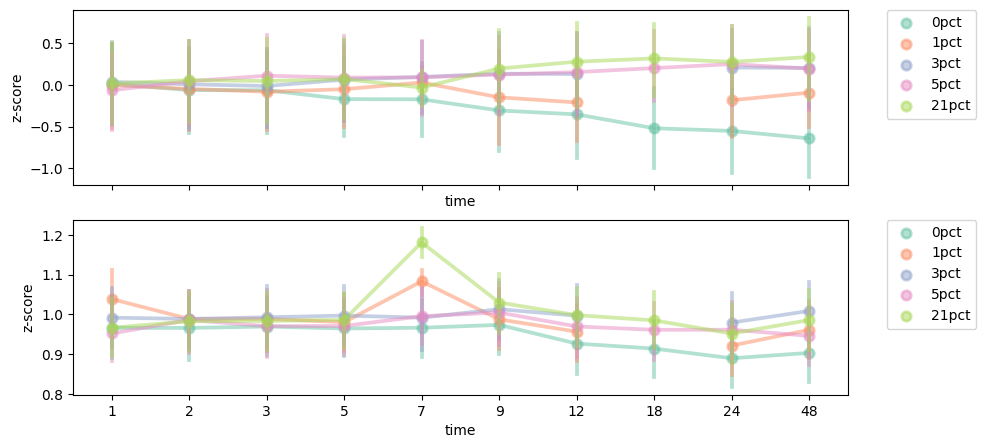

In [ ]:
oxphos_huvec = huvec_counts[huvec_counts['Complex'].notna()]
# Sort by time
oxphos_huvec = oxphos_huvec.sort_values(by = 'time')
# Plot the expression of oxphos_huvec genes over time in different ox_pct conditions
_, axes = plt.subplots(2,1, figsize = (10, 5), sharey = False, sharex = True)
sns.pointplot(data = oxphos_huvec[oxphos_huvec['Genome'] == 'MT'], x = 'time', y = 'z-score', hue = 'ox_pct', ax = axes[0], palette = 'Set2', hue_order = ['0pct', '1pct', '3pct', '5pct', '21pct'])
sns.pointplot(data = oxphos_huvec[oxphos_huvec['Genome'] == 'NUC'], x = 'time', y = 'z-score', hue = 'ox_pct', ax = axes[1], palette = 'Set2', hue_order = ['0pct', '1pct', '3pct', '5pct', '21pct'])
# Set alpha to .5
for ax in axes:
    for artist in ax.lines:
        artist.set_alpha(0.5)
    for artist in ax.collections:
        artist.set_alpha(0.5)

# Legend outside of plot
axes[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)